In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import imageio as imgio


In [3]:
all_africa = pd.read_csv('data/all_africa_southsudan.csv')

In [4]:
all_africa.head()

title        date  \
0  South Sudan: A Former Child Soldier Fights to ...  2021-02-12   
1  South Sudan: #budget2019 - Will It Lead to Mor...  2019-02-21   
2  South Sudan: Retired NBA Star Elected Basketba...  2019-11-25   
3  South Sudan - Political Violence On the Rise, ...  2022-02-11   
4  South Sudan: S. Sudan Receives First Astrazene...  2021-03-25   

                                          paragraphs  \
0  Sara, who was abducted at age 12, spent two ye...   
1  Legal claims against the department now amount...   
2  Former NBA star Luol Ajou Deng has been electe...   
3  UN human rights experts have warned of increas...   
4  Juba — South Sudan on Thursday received 132,00...   

                             publisher  
0  Thomson Reuters Foundation (London)  
1             Bhekisisa (Johannesburg)  
2           The East African (Nairobi)  
3                      UN News Service  
4           The East African (Nairobi)

In [5]:
all_africa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18226 entries, 0 to 18225
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       18226 non-null  object
 1   date        18226 non-null  object
 2   paragraphs  18226 non-null  object
 3   publisher   18226 non-null  object
dtypes: object(4)
memory usage: 569.7+ KB


In [6]:
all_africa.describe()

title        date  \
count                                               18226       18226   
unique                                              18226        3395   
top     South Sudan: A Former Child Soldier Fights to ...  2013-12-18   
freq                                                    1          53   

                                               paragraphs      publisher  
count                                               18226          18226  
unique                                              18191            274  
top     Juba — South Sudan President Salva Kiir has re...  Sudan Tribune  
freq                                                    2           4712

# Explore Article lengths

In [7]:
all_africa['length'] = all_africa['paragraphs'].apply(lambda x: len(str(x).split()))

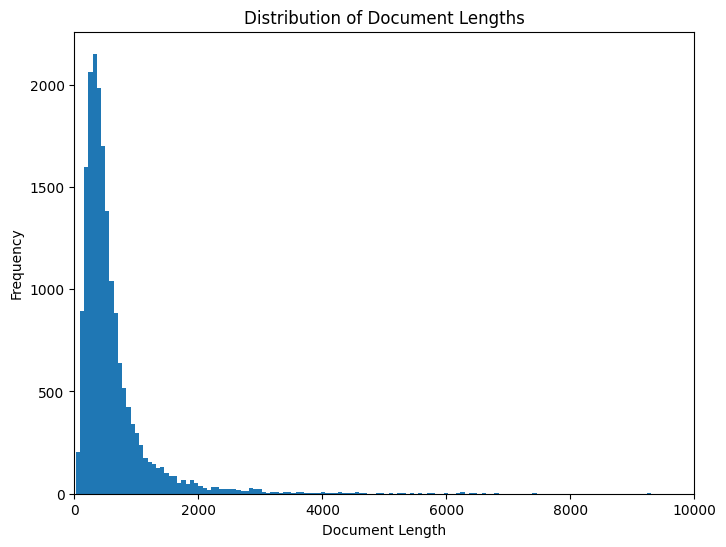

In [8]:
document_lengths = all_africa['length']

# Create a histogram to visualize the distribution
plt.figure(figsize=(8, 6))
plt.hist(document_lengths, bins=500)
plt.title('Distribution of Document Lengths')
plt.xlabel('Document Length')
plt.ylabel('Frequency')
plt.xlim(0,10000)
plt.show()

### how many articles are longer than 4000 words

In [9]:
len(all_africa[all_africa['length']>=4000])

143

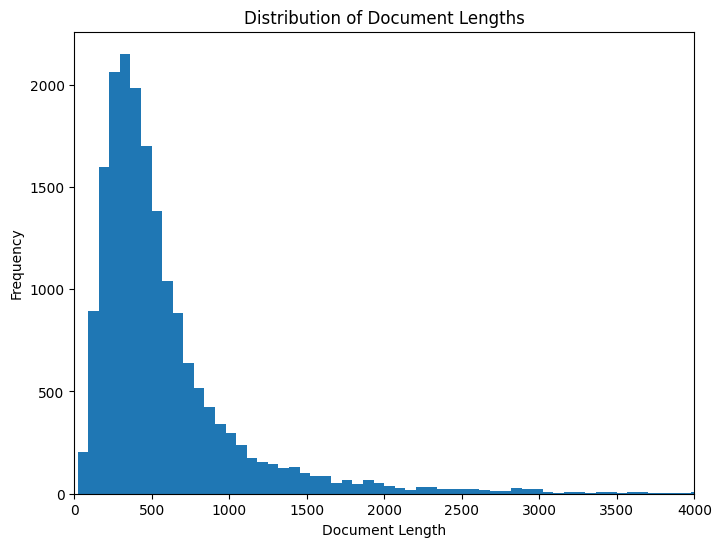

In [10]:
document_lengths = all_africa['length']

# Create a histogram to visualize the distribution
plt.figure(figsize=(8, 6))
plt.hist(document_lengths, bins=500)
plt.title('Distribution of Document Lengths')
plt.xlabel('Document Length')
plt.ylabel('Frequency')
plt.xlim(0,4000)
plt.show()

In [11]:
all_africa[all_africa['length']<=50].paragraphs

6        South Sudan President Salva Kiir has appointed...
1350     Khartoum — The South Sudan State Vice-Presiden...
2088     Khartoum — President of the Republic. Field Ma...
2452     South Sudan has now been admitted as the 6th c...
2534     Khartoum — The President of South Sudan, Salva...
2820     Joseph Afandi, a journalist with the El Tabeer...
2880     Juba — Over the past month, insecurity and lac...
3371     Juba, South Sudan — Relative calm returned in ...
3708     Attached is the full text of the reunification...
3829     Beijing — Foreign Minister of South Sudan Barn...
3995     Addis Ababa — The AU has issued a communiqué o...
4117     Juba, South Sudan — Conflict related displacem...
4982     On May 15, 2014, Special Representative on Afr...
5778     President Uhuru Kenyatta is today on a one day...
6153     Kenyans visiting South Sudan will no longer ha...
6964     At least 60 soldiers are said to Have been kil...
7032     In a phone call, Interim President Adli Mansou.

# explore article numbers over time

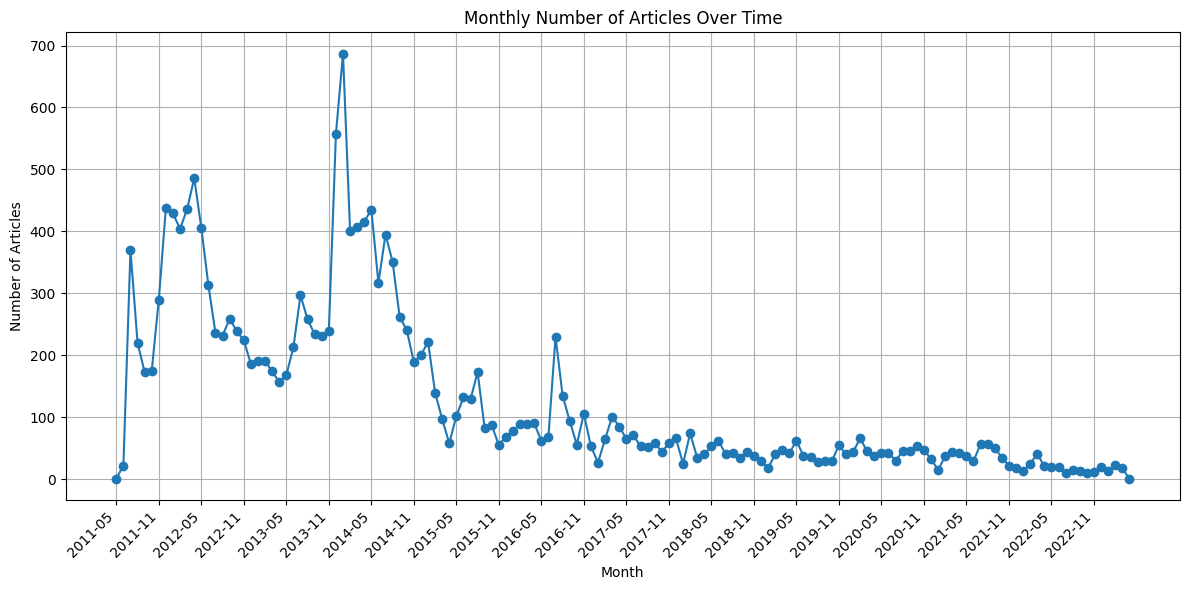

In [12]:
all_africa['date'] = pd.to_datetime(all_africa['date'])

# Group the data by month and count the number of articles published each month
grouped = all_africa.groupby(all_africa['date'].dt.to_period('M'))['title'].count()

# Convert the 'Period' index to a string representation
grouped.index = grouped.index.strftime('%Y-%m')

# Create the time series plot
plt.figure(figsize=(12, 6))
plt.plot(grouped.index, grouped.values, marker='o')
plt.title('Monthly Number of Articles Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.grid(True)

# Optionally, you can format the x-axis to show months nicely
x_ticks = np.arange(0, len(grouped.index), 6)
plt.xticks(x_ticks, grouped.index[x_ticks], rotation=45, ha='right')

plt.tight_layout()

# what occured in 2014?

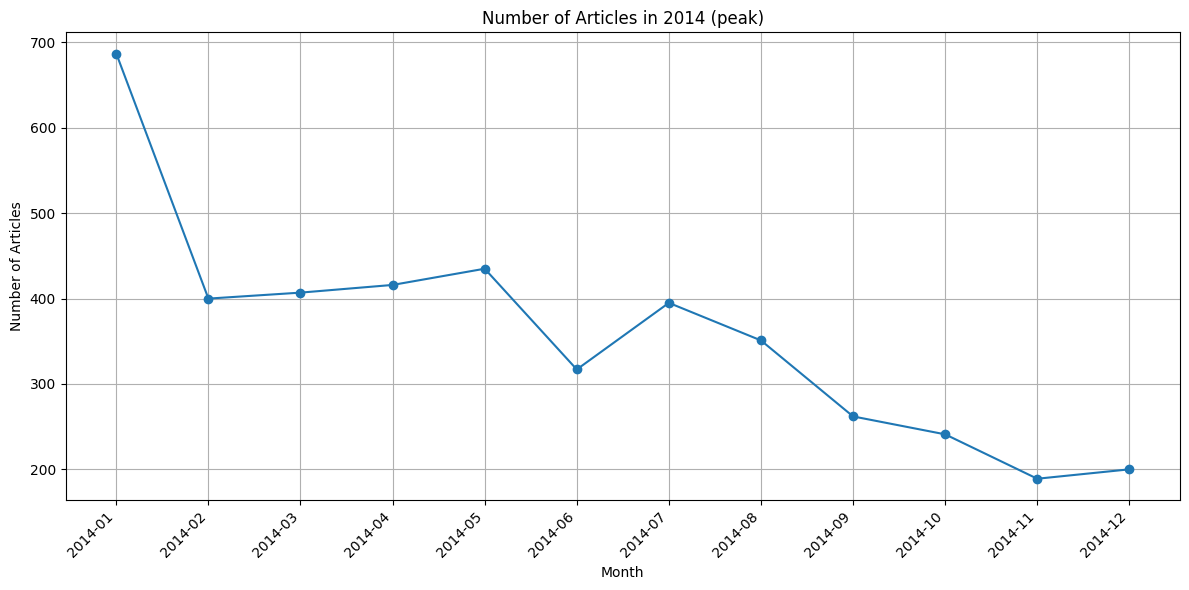

In [13]:
all_africa['date'] = pd.to_datetime(all_africa['date'])

# Filter the data for the year 2014
all_africa_2014 = all_africa[all_africa['date'].dt.year == 2014]

# Group the data by month and count the number of articles published each month
grouped = all_africa_2014.groupby(all_africa['date'].dt.to_period('M'))['title'].count()
grouped.index = grouped.index.strftime('%Y-%m')

# Create the time series plot
plt.figure(figsize=(12, 6))
plt.plot(grouped.index, grouped.values, marker='o')
plt.title('Number of Articles in 2014 (peak)')
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.grid(True)

x_ticks = np.arange(0, len(grouped.index), 1)
plt.xticks(x_ticks, grouped.index[x_ticks], rotation=45, ha='right')

plt.tight_layout()

# Exploring Food_Crises_Cleaned

In [14]:
df = pd.read_csv("data/food_crises_cleaned.csv") # Read data into DataFrame
df["date"] = pd.to_datetime(df["year_month"], format="%Y_%m") # Create date column
print(len(df['district'].unique()))
df.set_index(["date", "district"], inplace=True) # Set index

78


### not every row has an ipc score

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 12324 entries, (Timestamp('2007-01-01 00:00:00'), 'Bor') to (Timestamp('2020-02-01 00:00:00'), 'Malakal')
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          12324 non-null  object 
 1   district_code    12324 non-null  int64  
 2   centx            12324 non-null  float64
 3   centy            12324 non-null  float64
 4   year_month       12324 non-null  object 
 5   year             12324 non-null  int64  
 6   month            12324 non-null  int64  
 7   ipc              3042 non-null   float64
 8   ha               2184 non-null   float64
 9   ndvi_mean        12324 non-null  float64
 10  ndvi_anom        12324 non-null  float64
 11  rain_mean        12324 non-null  float64
 12  rain_anom        12324 non-null  float64
 13  et_mean          12324 non-null  float64
 14  et_anom          12324 non-null  float64
 15  count_violence   12324 n

In [16]:
df.describe()

district_code         centx         centy          year         month  \
count   12324.000000  12324.000000  12324.000000  12324.000000  12324.000000   
mean      112.500000     30.552041      7.325735   2013.088608      6.436709   
std        22.515723      2.063909      1.927968      3.799521      3.475977   
min        74.000000     25.589390      3.737241   2007.000000      1.000000   
25%        93.000000     29.130190      5.460567   2010.000000      3.000000   
50%       112.500000     30.584770      7.558543   2013.000000      6.000000   
75%       132.000000     32.210300      8.930423   2016.000000      9.000000   
max       151.000000     34.606250     11.362640   2020.000000     12.000000   

               ipc           ha     ndvi_mean     ndvi_anom     rain_mean  \
count  3042.000000  2184.000000  12324.000000  12324.000000  12324.000000   
mean      2.124918     0.125458      0.523914    102.777150     13.410813   
std       0.896948     0.331313      0.173015     10.318057     12.174414   
min       1.000000     0.000000      0.181902     62.629560      0.000009   
25%       1.000000     0.000000      0.364779     97.583780      1.080134   
50%       2.000000     0.000000      0.540265    101.956000     11.668220   
75%       3.000000     0.000000      0.675034    107.021850     23.610402   
max       5.000000     1.000000      0.852260    183.192100     49.343280   

       ...       et_mean       et_anom  count_violence  sum_fatalities  \
count  ...  12324.000000  12324.000000    12324.000000    12324.000000   
mean   ...     13.922836      1.098669        0.543492        3.220789   
std    ...     12.385726      3.419724        1.805653       37.882633   
min    ...      0.000273    -12.117810        0.000000        0.000000   
25%    ...      1.587718     -0.632700        0.000000        0.000000   
50%    ...     11.349735      0.329042        0.000000        0.000000   
75%    ...     24.470100      3.122106        0.000000        0.000000   
max    ...     47.904190     17.113410       57.000000     2394.000000   

       food_price_idx          area  cropland_pct            pop  \
count    12324.000000  12324.000000  12324.000000   12324.000000   
mean        13.890655   8109.035212     18.570146  147039.099666   
std         22.856678   8116.418198     14.369645  101589.906878   
min          0.459595    757.785500      0.032678   11352.160000   
25%          1.032964   4419.444000      6.354869   75670.000000   
50%          2.108440   5881.470500     16.874360  123093.000000   
75%         15.723220   9237.169000     28.638140  185184.900000   
max        139.999100  62296.580000     68.842480  984111.300000   

       ruggedness_mean   pasture_pct  
count     12324.000000  12324.000000  
mean      33427.480308     80.555837  
std       51714.447306     10.765849  
min        2787.772000     58.213330  
25%        8429.583000     71.411760  
50%       15014.300000     85.683480  
75%       40366.550000     89.581820  
max      341473.800000     93.459460  

[8 rows x 21 columns]

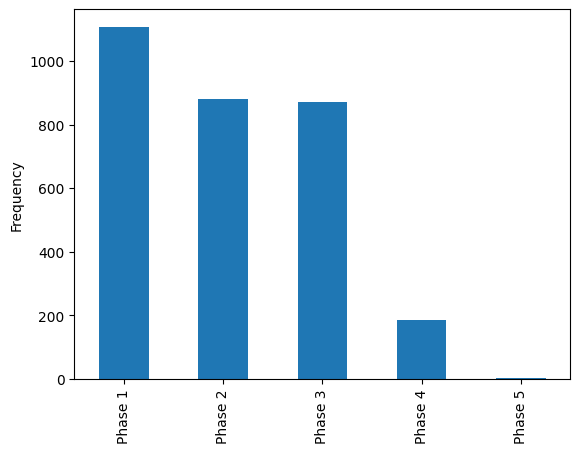

In [17]:
ax = df["ipc"].value_counts().plot(kind="bar") # Initialize barplot of fews_ipc counts
ax.set_xticklabels(["Phase {}".format(i) for i in range(1, 6)]) # Label the phases
ax.set_ylabel('Frequency'); # Set y label

In [18]:
df.reset_index()[["ipc", "district"]]

ipc district
0      NaN      Bor
1      NaN      Bor
2      NaN      Bor
3      NaN      Bor
4      NaN      Bor
...    ...      ...
12319  3.0  Malakal
12320  NaN  Malakal
12321  NaN  Malakal
12322  NaN  Malakal
12323  4.0  Malakal

[12324 rows x 2 columns]

C:\Users\20202182\AppData\Local\Temp\ipykernel_17892\1811086562.py:7: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world
C:\Users\20202182\AppData\Local\Temp\ipykernel_17892\1811086562.py:7: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world
C:\Users\20202182\AppData\Local\Temp\ipykernel_17892\1811086562.py:7: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www

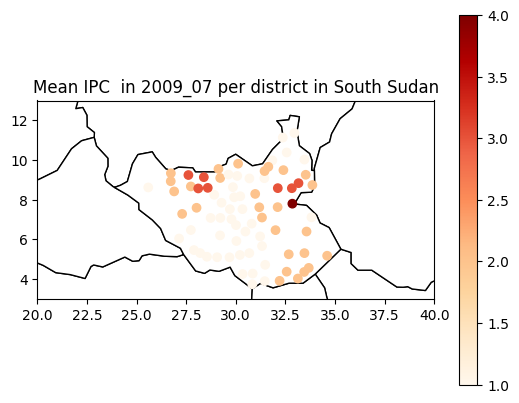

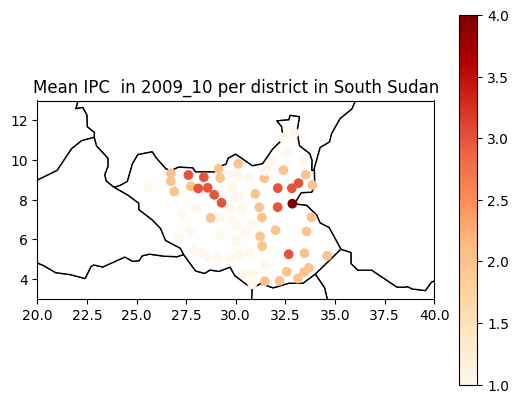

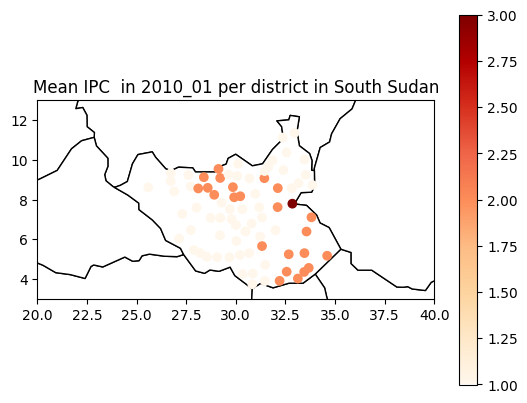

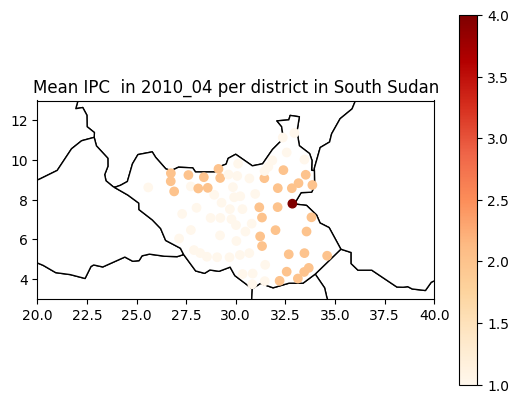

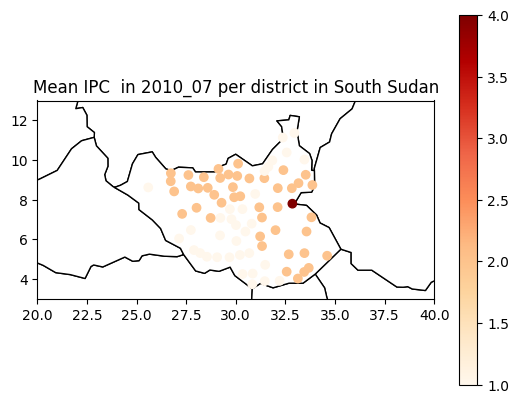

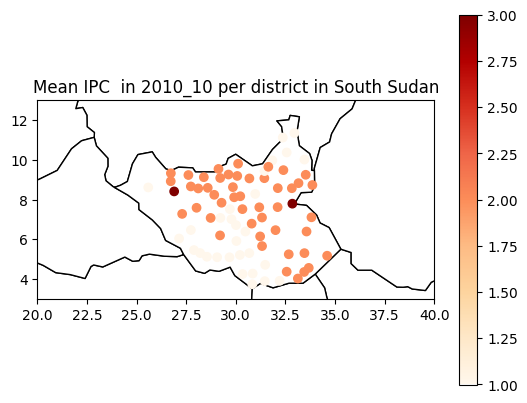

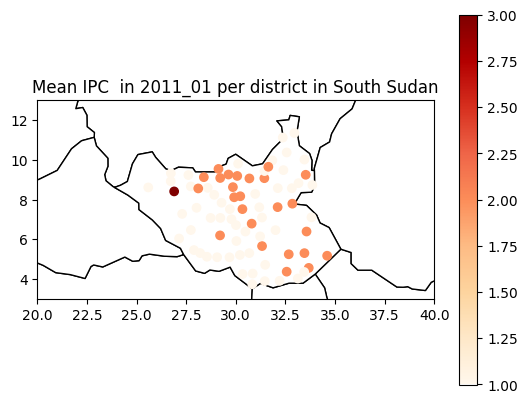

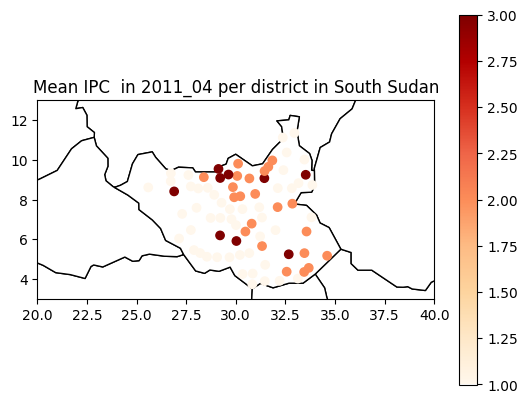

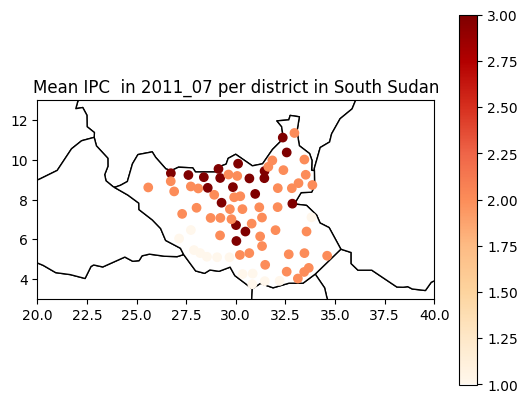

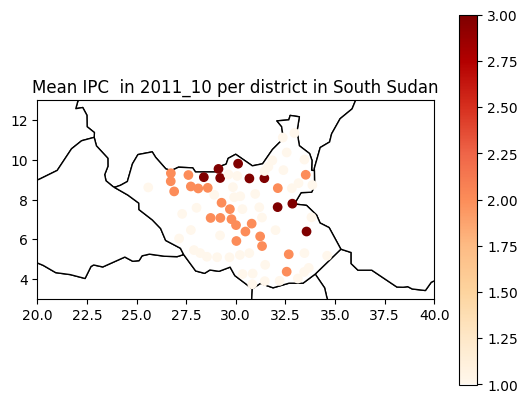

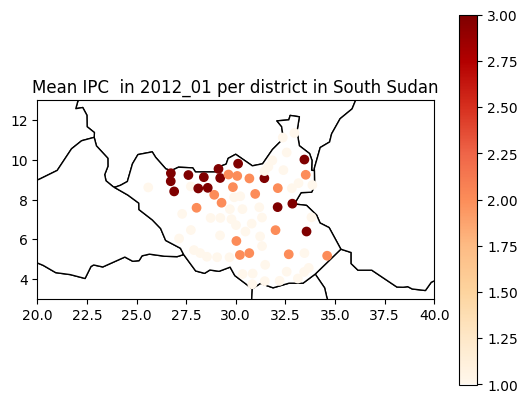

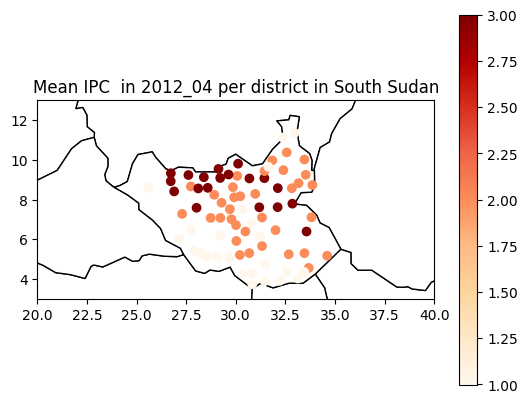

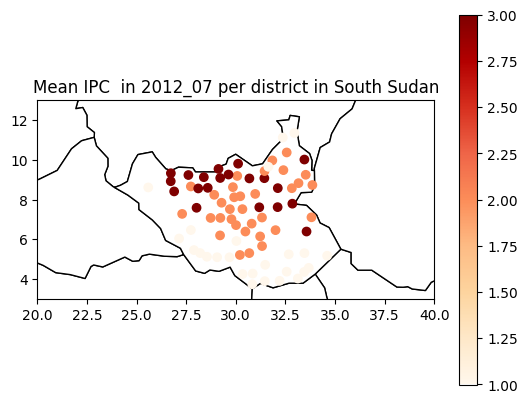

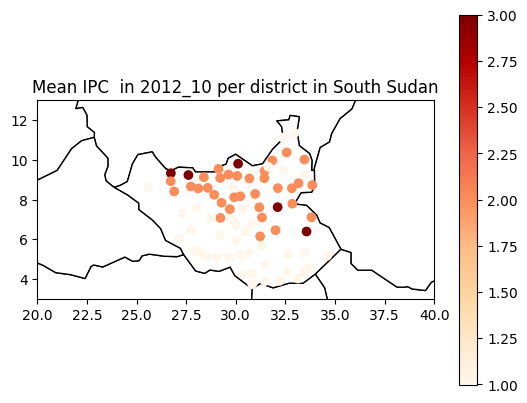

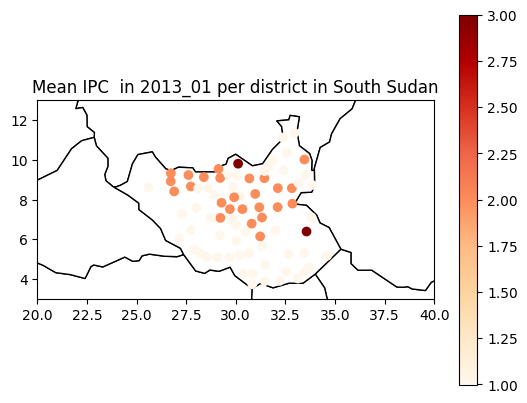

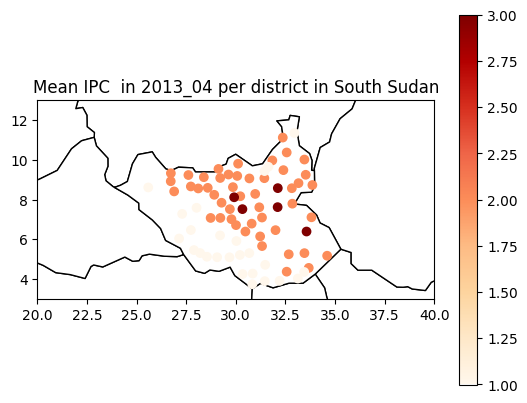

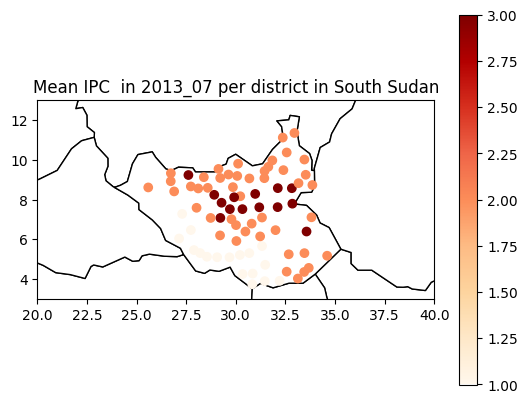

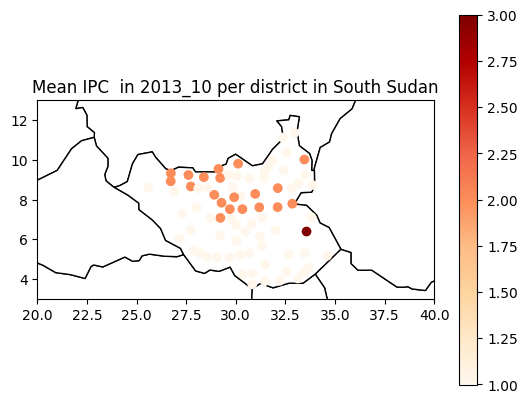

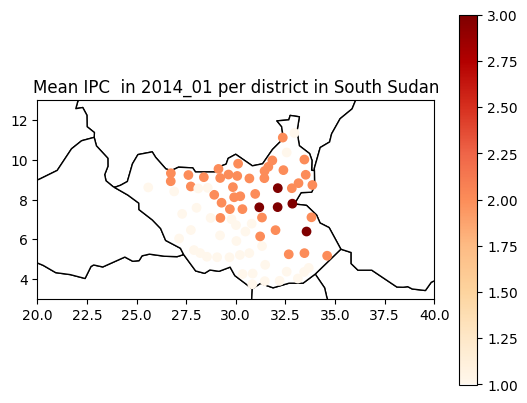

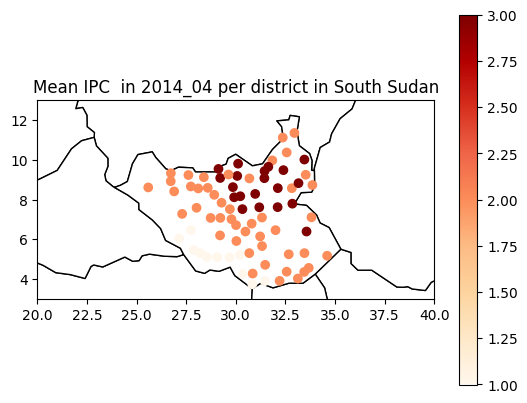

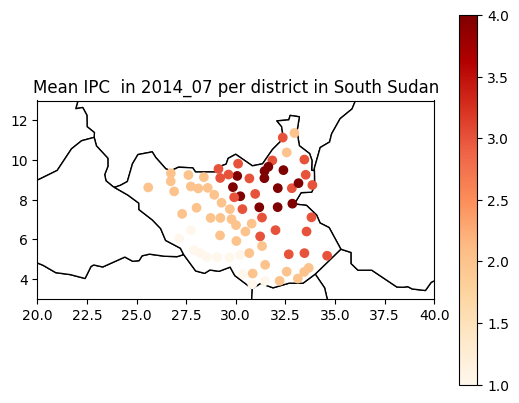

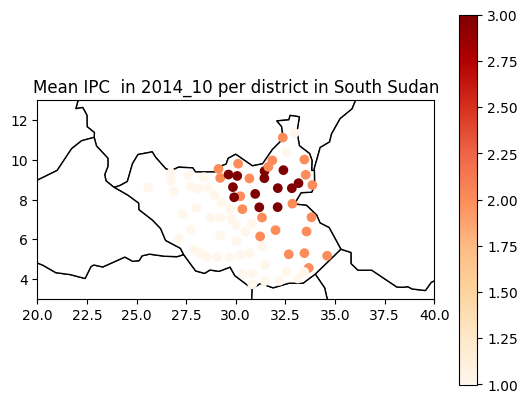

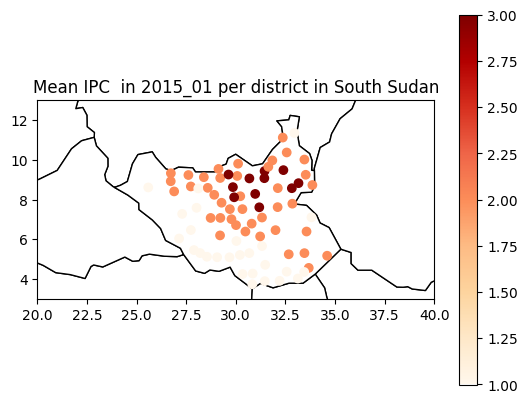

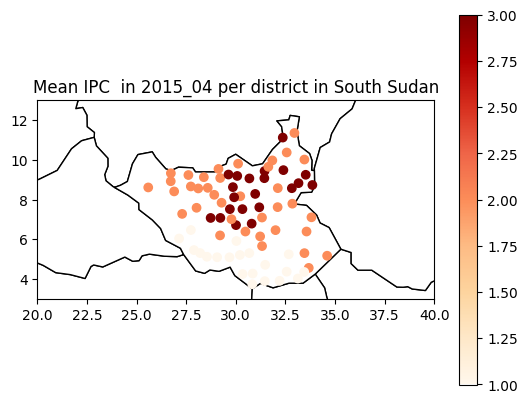

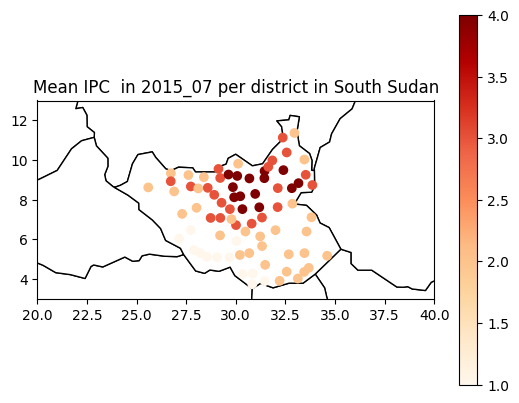

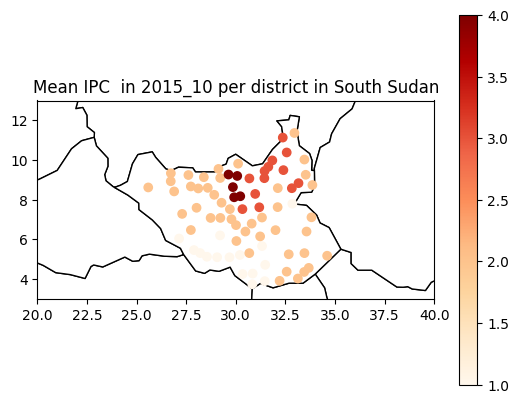

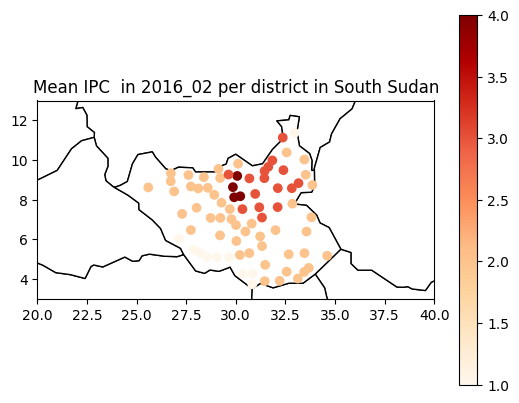

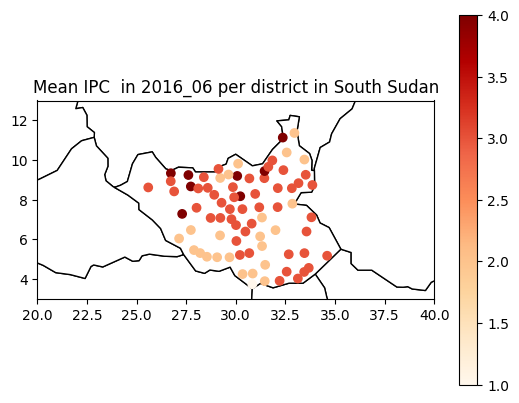

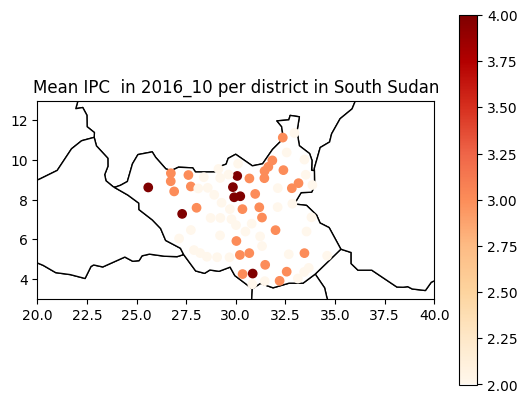

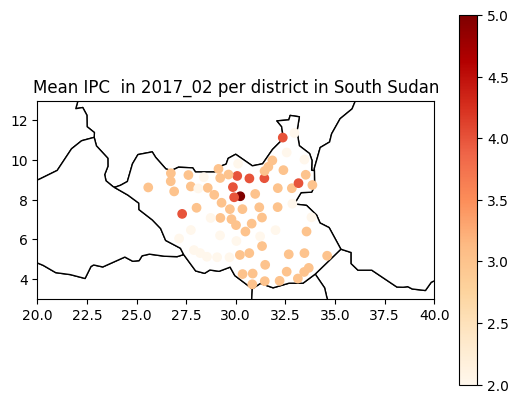

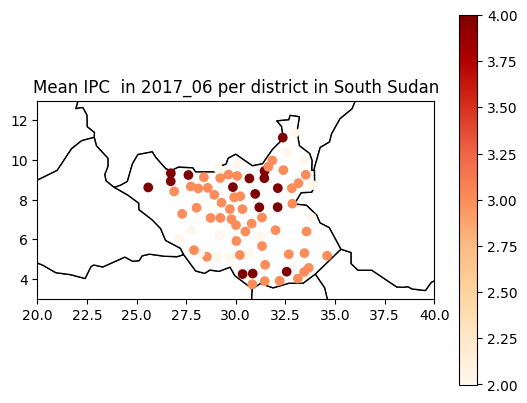

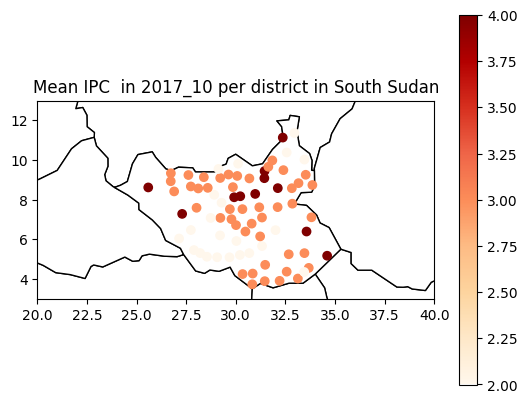

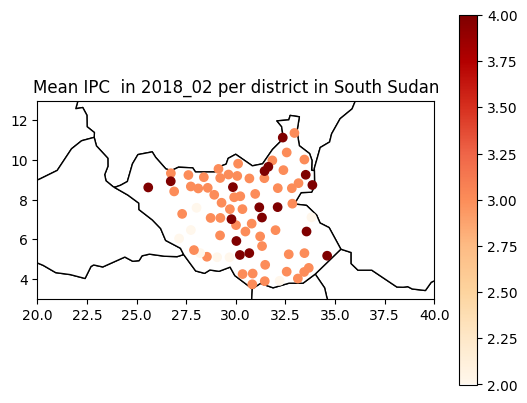

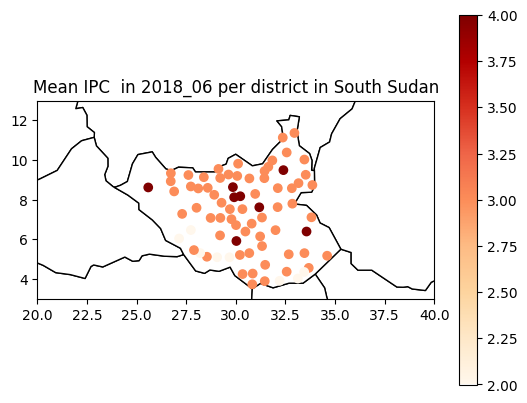

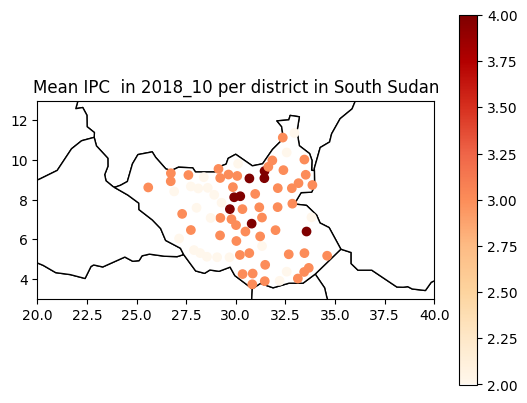

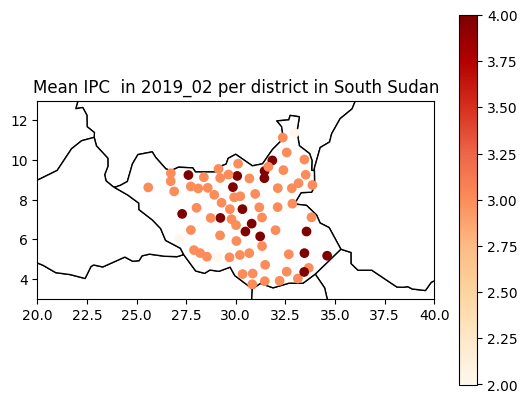

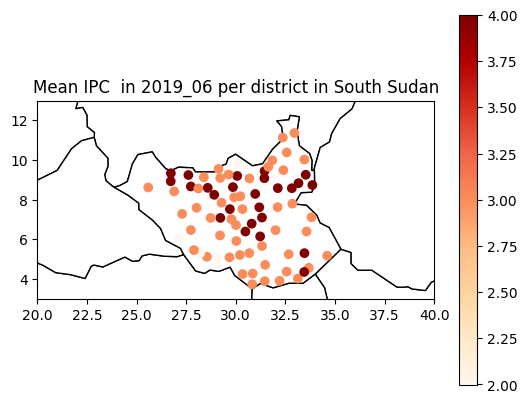

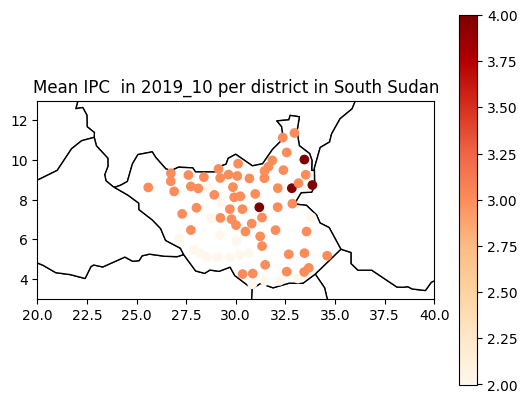

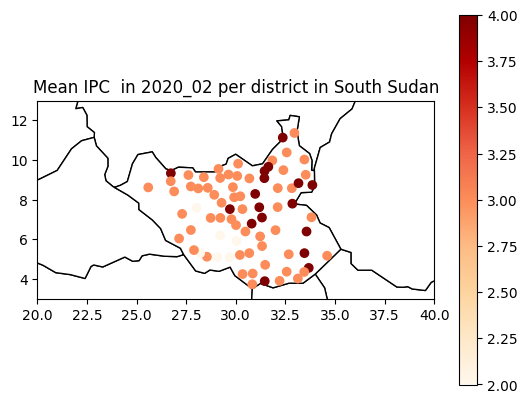

In [19]:
filenames =[]
df.dropna(subset=['ipc'], inplace=True)

for month in df['year_month'].unique():
    data_for_month = df[df['year_month'] == month].reset_index()

    world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world

    ax = world.plot(color="white", edgecolor="black") # Plot world map

    # Bound map to south sudan
    ax.set_xlim(20, 40)
    ax.set_ylim(3, 13)

    gdf = gpd.GeoDataFrame(data_for_month, geometry=gpd.points_from_xy(data_for_month["centx"], data_for_month["centy"])) # Initialize GeoDataFrame

    # Calculate mean ipc per administration
    mean_ipc = (
        data_for_month.reset_index()[["ipc", "district"]]
        .groupby("district")
        .mean()
        .rename(columns={"ipc": "mean_ipc"})
    )

    # Plot mean ipc per administration on map
    gdf.merge(mean_ipc, on="district").plot(
        column="mean_ipc", ax=ax, legend=True, cmap="OrRd"
    )

    # Set plot title
    ax.set_title(f"Mean IPC  in {month} per district in South Sudan")

    filename = f'images/IPC{month}.png'
    filenames.append(filename)
    plt.savefig(filename)
    #plt.show()

In [20]:
#create GIF from plots
with imgio.get_writer('MeanIPC.gif', duration=500) as writer:
    for filename in filenames:
        image = imgio.imread(filename)
        writer.append_data(image)

C:\Users\20202182\AppData\Local\Temp\ipykernel_17892\3145082857.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imgio.imread(filename)


C:\Users\20202182\AppData\Local\Temp\ipykernel_17892\3665741212.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


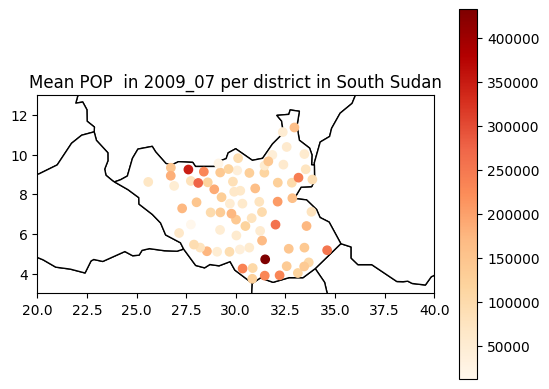

C:\Users\20202182\AppData\Local\Temp\ipykernel_17892\3665741212.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


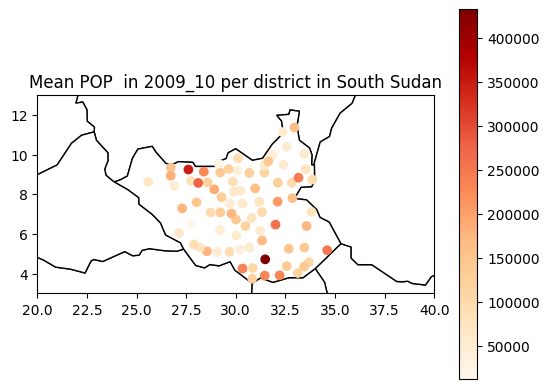

C:\Users\20202182\AppData\Local\Temp\ipykernel_17892\3665741212.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


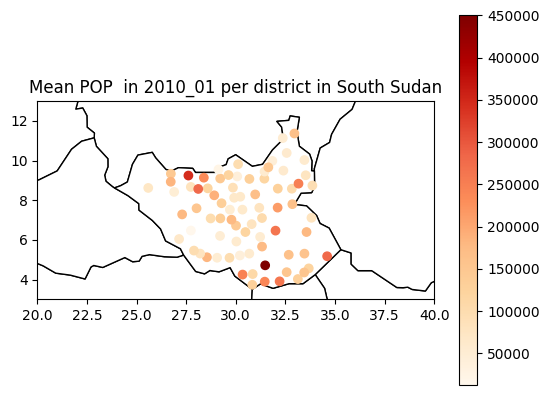

C:\Users\20202182\AppData\Local\Temp\ipykernel_17892\3665741212.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


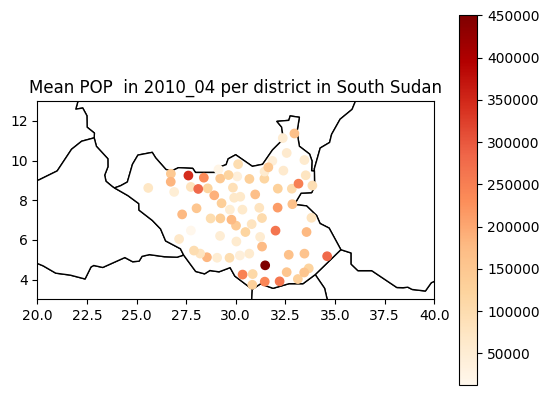

C:\Users\20202182\AppData\Local\Temp\ipykernel_17892\3665741212.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


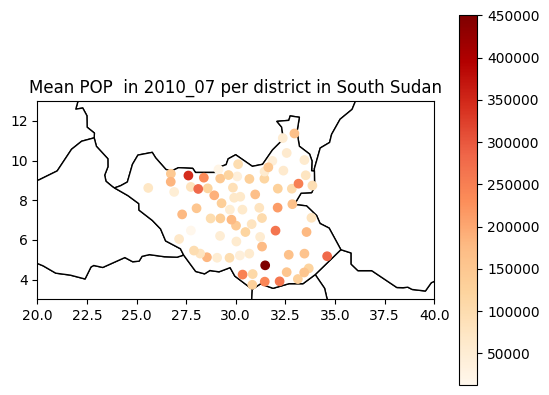

C:\Users\20202182\AppData\Local\Temp\ipykernel_17892\3665741212.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


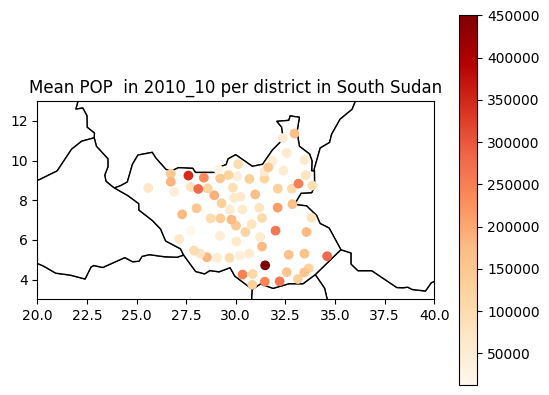

C:\Users\20202182\AppData\Local\Temp\ipykernel_17892\3665741212.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


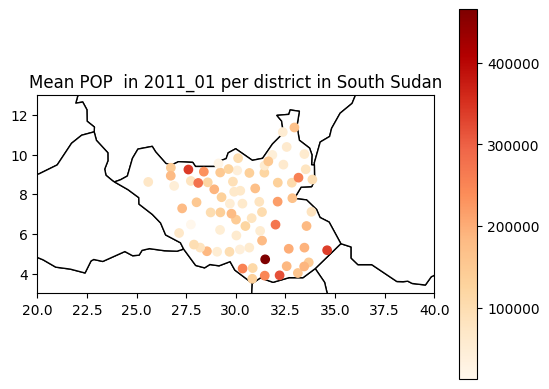

C:\Users\20202182\AppData\Local\Temp\ipykernel_17892\3665741212.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


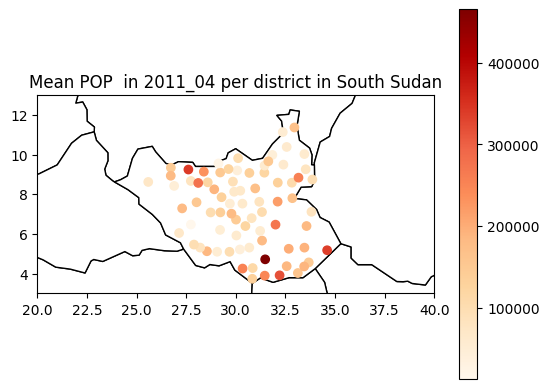

C:\Users\20202182\AppData\Local\Temp\ipykernel_17892\3665741212.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


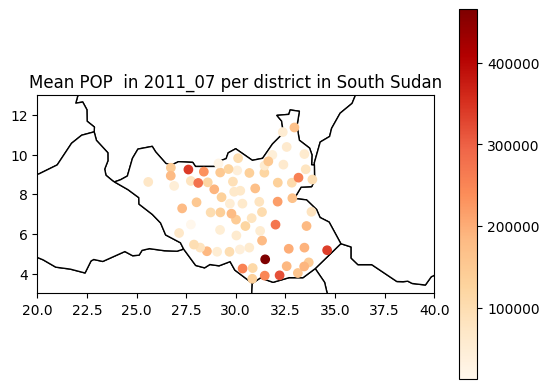

C:\Users\20202182\AppData\Local\Temp\ipykernel_17892\3665741212.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


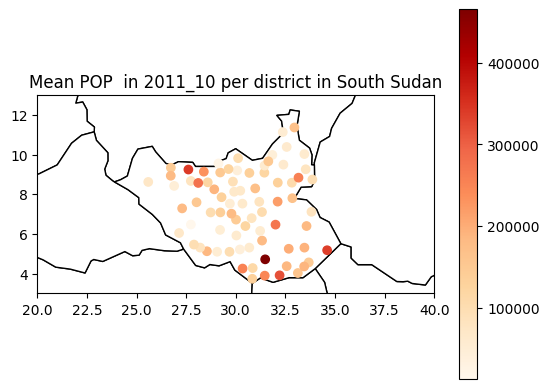

C:\Users\20202182\AppData\Local\Temp\ipykernel_17892\3665741212.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


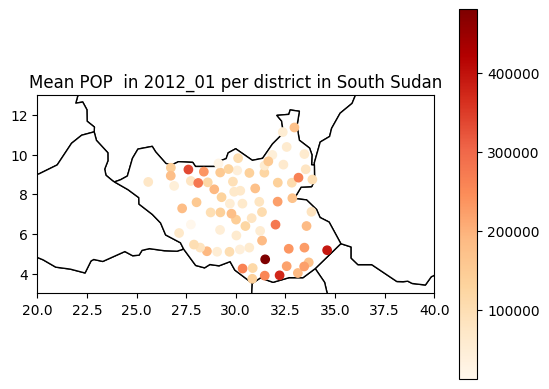

C:\Users\20202182\AppData\Local\Temp\ipykernel_17892\3665741212.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


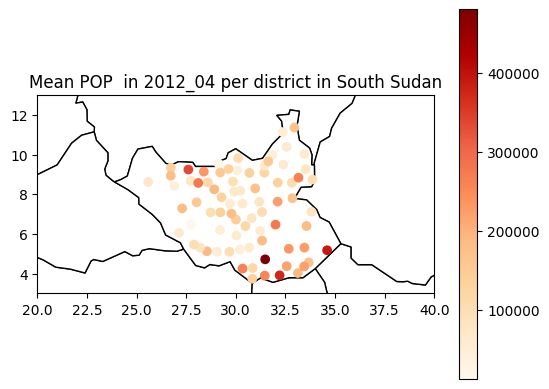

C:\Users\20202182\AppData\Local\Temp\ipykernel_17892\3665741212.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


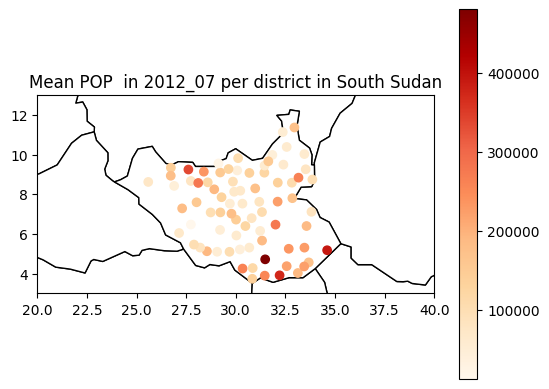

C:\Users\20202182\AppData\Local\Temp\ipykernel_17892\3665741212.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


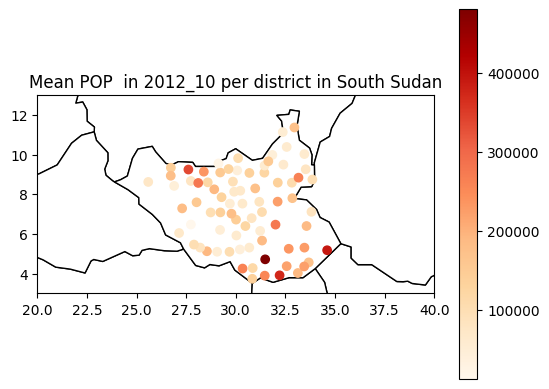

C:\Users\20202182\AppData\Local\Temp\ipykernel_17892\3665741212.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


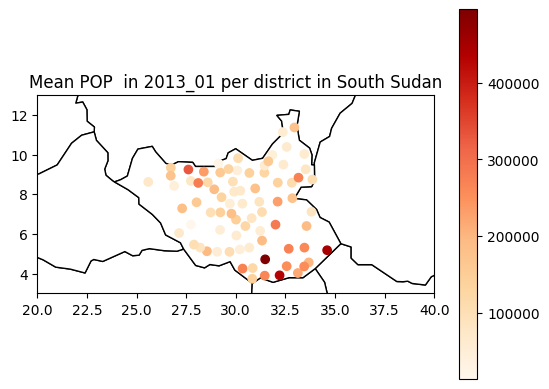

C:\Users\20202182\AppData\Local\Temp\ipykernel_17892\3665741212.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


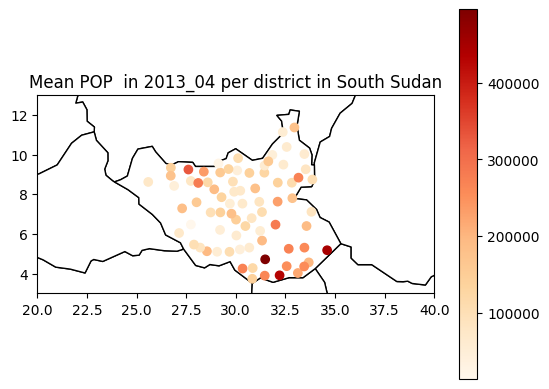

C:\Users\20202182\AppData\Local\Temp\ipykernel_17892\3665741212.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


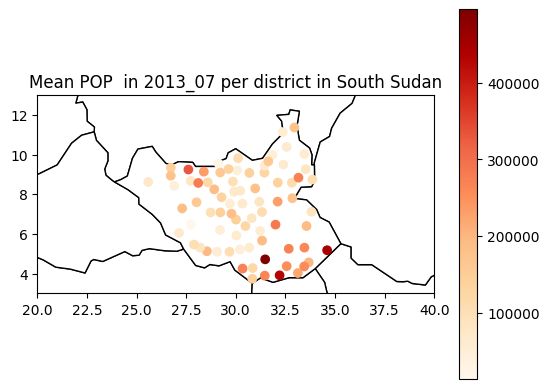

C:\Users\20202182\AppData\Local\Temp\ipykernel_17892\3665741212.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


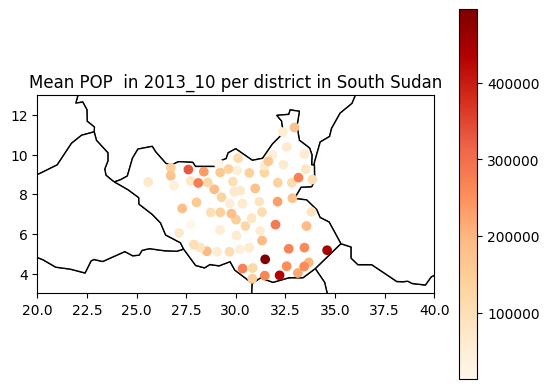

C:\Users\20202182\AppData\Local\Temp\ipykernel_17892\3665741212.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


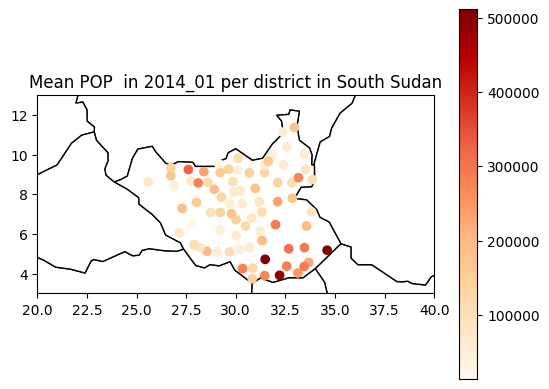

C:\Users\20202182\AppData\Local\Temp\ipykernel_17892\3665741212.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


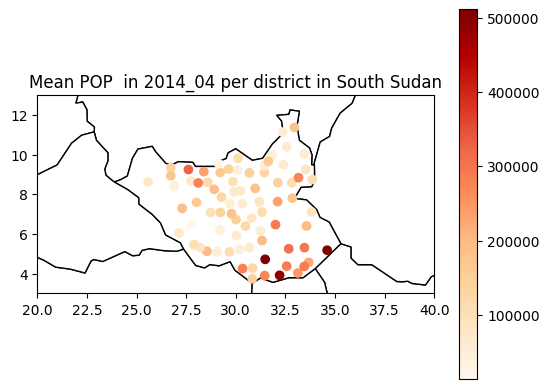

C:\Users\20202182\AppData\Local\Temp\ipykernel_17892\3665741212.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


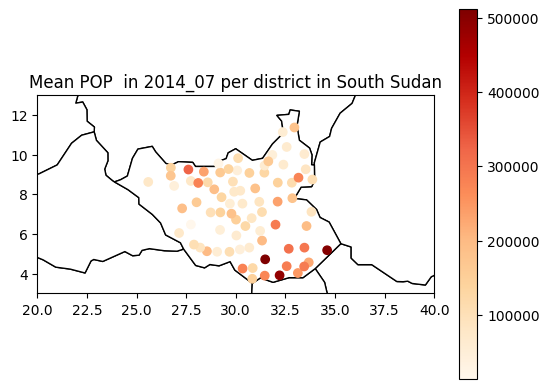

C:\Users\20202182\AppData\Local\Temp\ipykernel_17892\3665741212.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


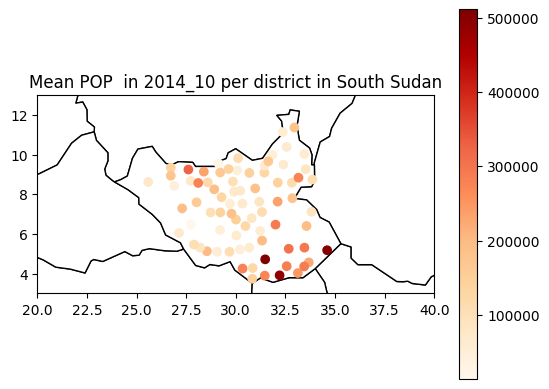

C:\Users\20202182\AppData\Local\Temp\ipykernel_17892\3665741212.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


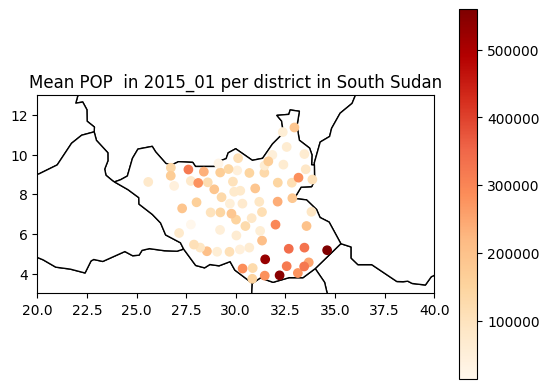

C:\Users\20202182\AppData\Local\Temp\ipykernel_17892\3665741212.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


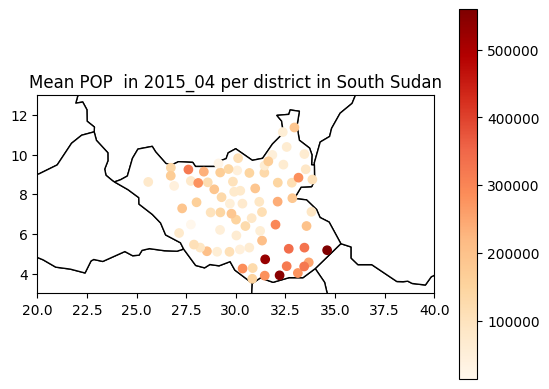

C:\Users\20202182\AppData\Local\Temp\ipykernel_17892\3665741212.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


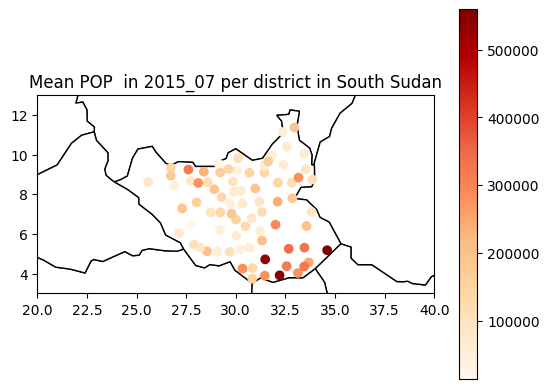

C:\Users\20202182\AppData\Local\Temp\ipykernel_17892\3665741212.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


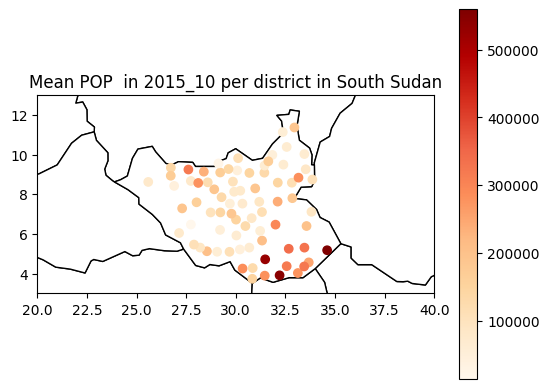

C:\Users\20202182\AppData\Local\Temp\ipykernel_17892\3665741212.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


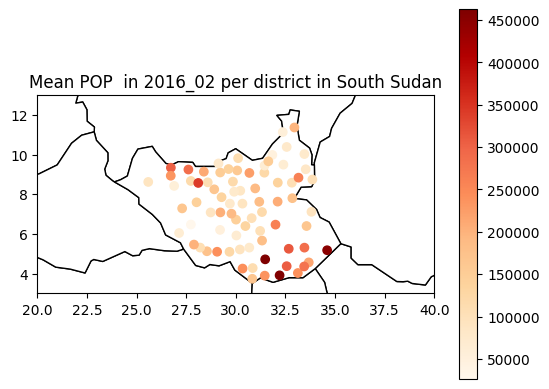

C:\Users\20202182\AppData\Local\Temp\ipykernel_17892\3665741212.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


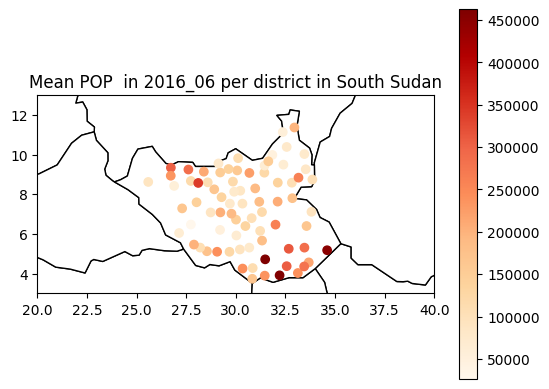

C:\Users\20202182\AppData\Local\Temp\ipykernel_17892\3665741212.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


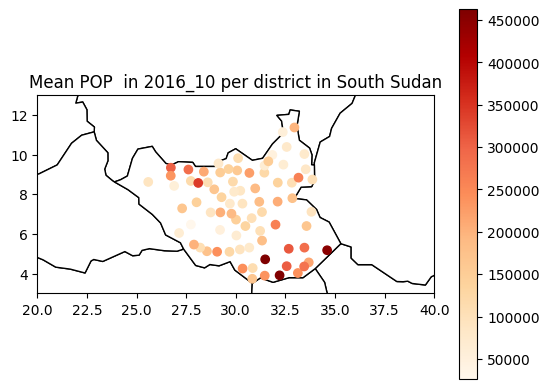

C:\Users\20202182\AppData\Local\Temp\ipykernel_17892\3665741212.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


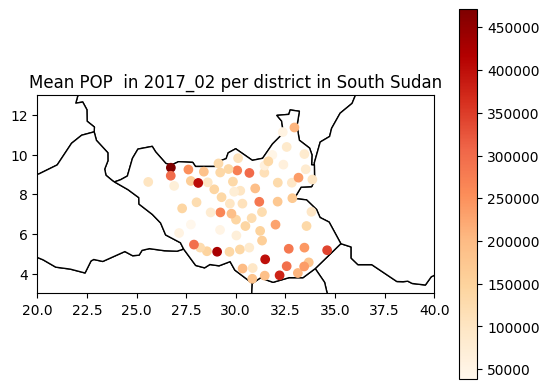

C:\Users\20202182\AppData\Local\Temp\ipykernel_17892\3665741212.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


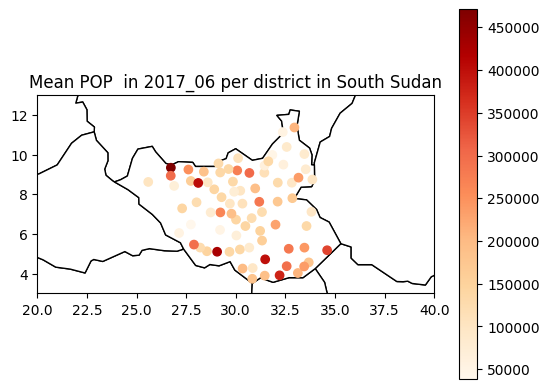

C:\Users\20202182\AppData\Local\Temp\ipykernel_17892\3665741212.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


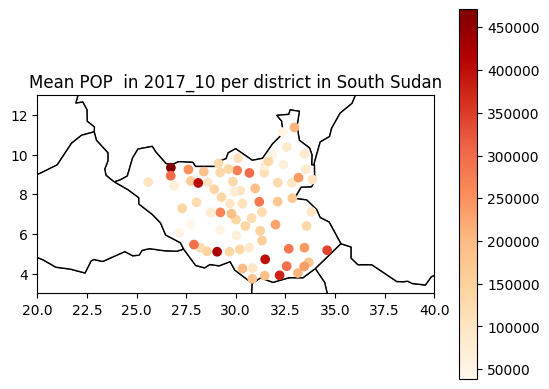

C:\Users\20202182\AppData\Local\Temp\ipykernel_17892\3665741212.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


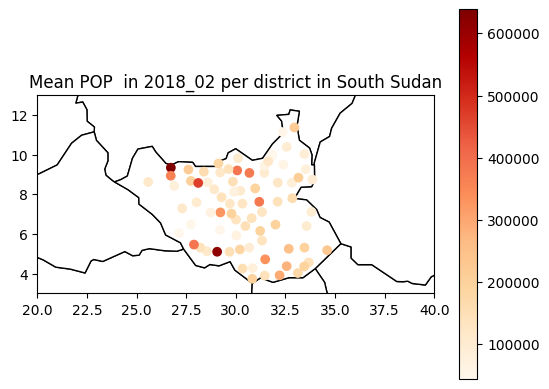

C:\Users\20202182\AppData\Local\Temp\ipykernel_17892\3665741212.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


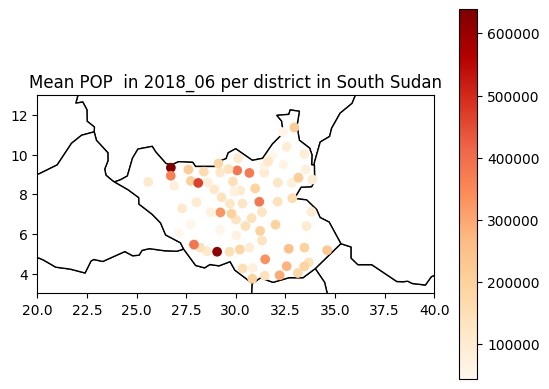

C:\Users\20202182\AppData\Local\Temp\ipykernel_17892\3665741212.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


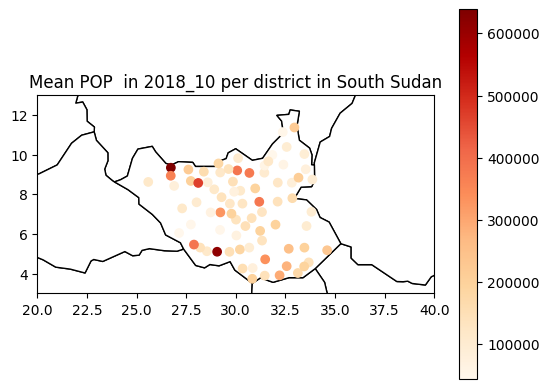

C:\Users\20202182\AppData\Local\Temp\ipykernel_17892\3665741212.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


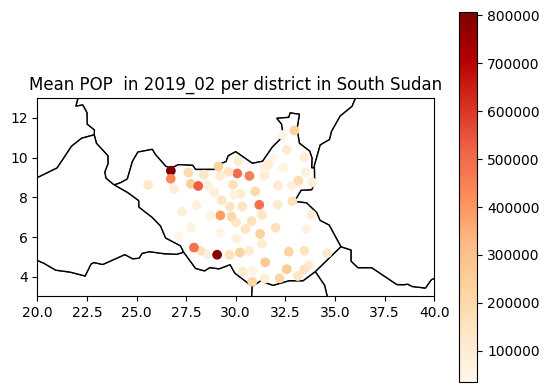

C:\Users\20202182\AppData\Local\Temp\ipykernel_17892\3665741212.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


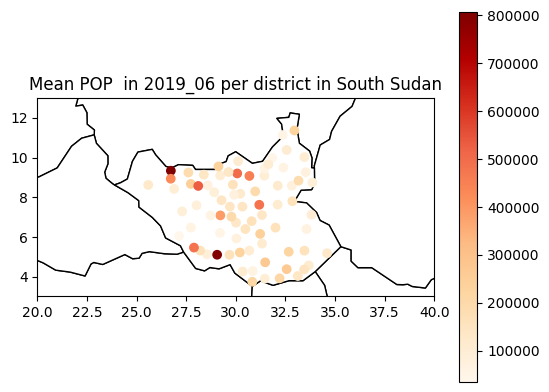

C:\Users\20202182\AppData\Local\Temp\ipykernel_17892\3665741212.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


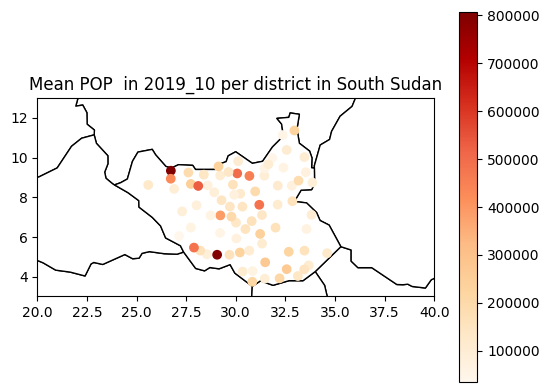

C:\Users\20202182\AppData\Local\Temp\ipykernel_17892\3665741212.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


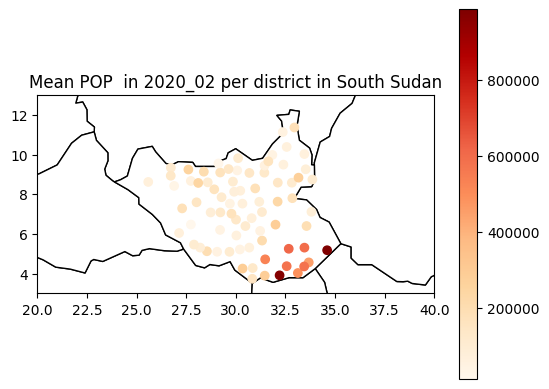

In [21]:
#plot total population of region
filenames =[]
df.dropna(subset=['ipc'], inplace=True)

for month in df['year_month'].unique():
    data_for_month = df[df['year_month'] == month].reset_index()

    world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world

    ax = world.plot(color="white", edgecolor="black") # Plot world map

    # Bound map to south sudan
    ax.set_xlim(20, 40)
    ax.set_ylim(3, 13)

    gdf = gpd.GeoDataFrame(data_for_month, geometry=gpd.points_from_xy(data_for_month["centx"], data_for_month["centy"])) # Initialize GeoDataFrame

    # Calculate mean pop per administration
    mean_pop = (
        data_for_month.reset_index()[["pop", "district"]]
        .groupby("district")
        .mean()
        .rename(columns={"pop": "mean_pop"})
    )

    # Plot mean pop per administration on map
    gdf.merge(mean_pop, on="district").plot(
        column="mean_pop", ax=ax, legend=True, cmap="OrRd"
    )

    # Set plot title
    ax.set_title(f"Mean POP  in {month} per district in South Sudan")

    filename = f'images/POP{month}.png'
    filenames.append(filename)
    plt.savefig(filename)
    plt.show()


In [22]:
#create GIF from plots
with imgio.get_writer('MeanPOP.gif', duration=500) as writer:
    for filename in filenames:
        image = imgio.imread(filename)
        writer.append_data(image)

C:\Users\20202182\AppData\Local\Temp\ipykernel_17892\2537083198.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imgio.imread(filename)


C:\Users\20202182\AppData\Local\Temp\ipykernel_17892\1068525368.py:11: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


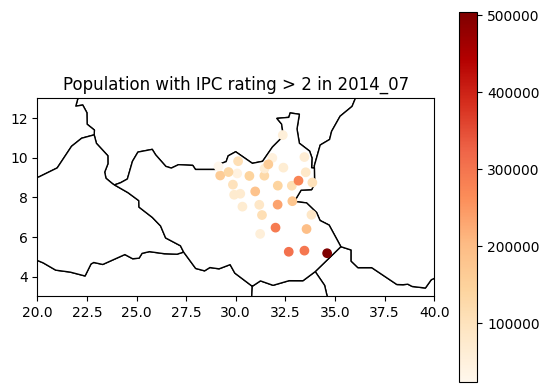

C:\Users\20202182\AppData\Local\Temp\ipykernel_17892\1068525368.py:11: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


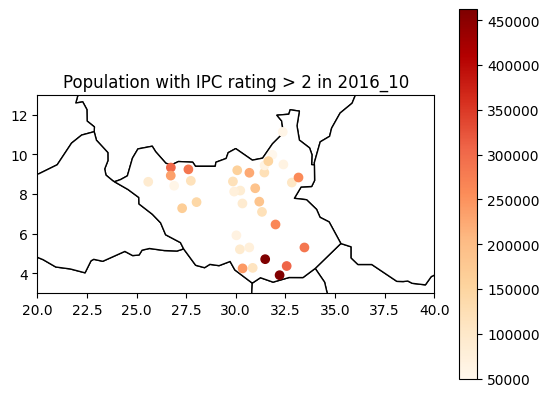

C:\Users\20202182\AppData\Local\Temp\ipykernel_17892\1068525368.py:11: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


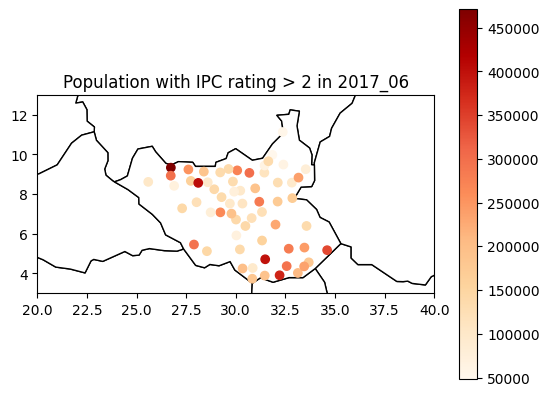

C:\Users\20202182\AppData\Local\Temp\ipykernel_17892\1068525368.py:11: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


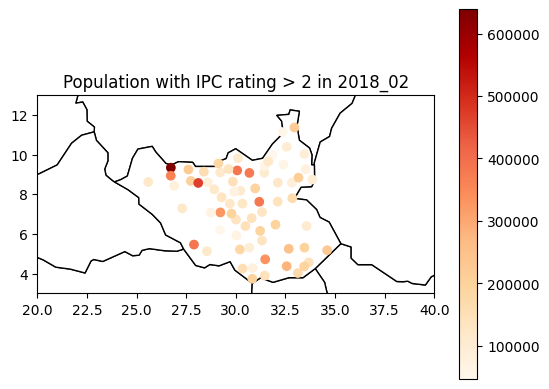

C:\Users\20202182\AppData\Local\Temp\ipykernel_17892\1068525368.py:11: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


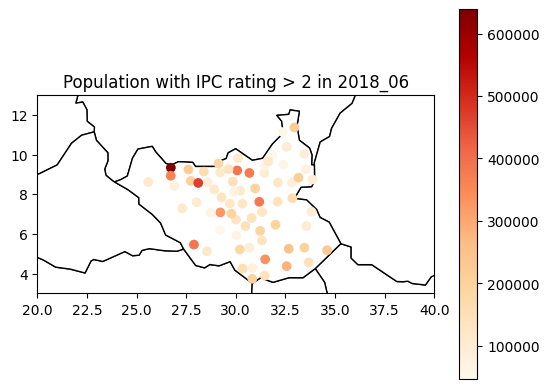

C:\Users\20202182\AppData\Local\Temp\ipykernel_17892\1068525368.py:11: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


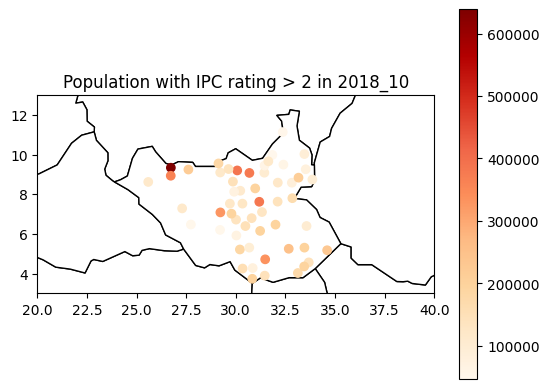

C:\Users\20202182\AppData\Local\Temp\ipykernel_17892\1068525368.py:11: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


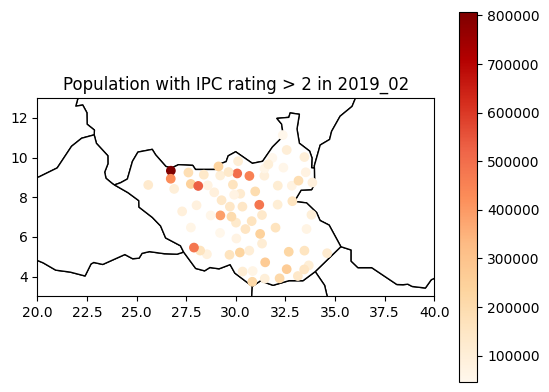

C:\Users\20202182\AppData\Local\Temp\ipykernel_17892\1068525368.py:11: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


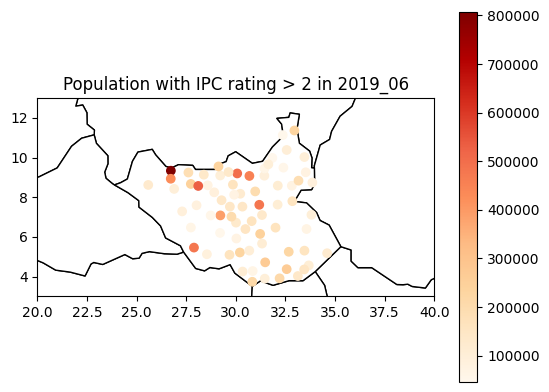

C:\Users\20202182\AppData\Local\Temp\ipykernel_17892\1068525368.py:11: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


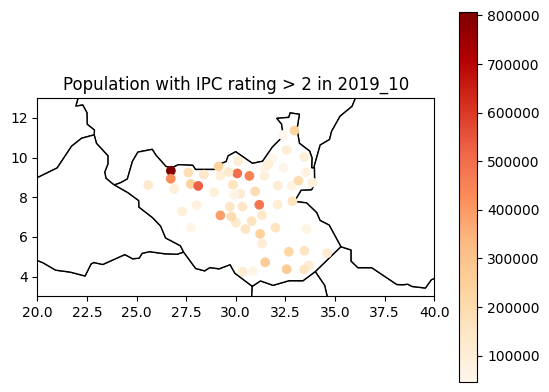

C:\Users\20202182\AppData\Local\Temp\ipykernel_17892\1068525368.py:11: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


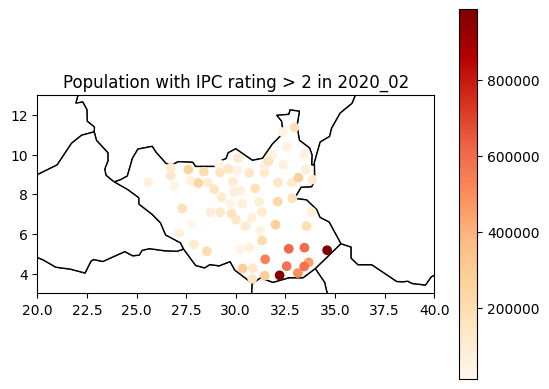

C:\Users\20202182\AppData\Local\Temp\ipykernel_17892\1068525368.py:11: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


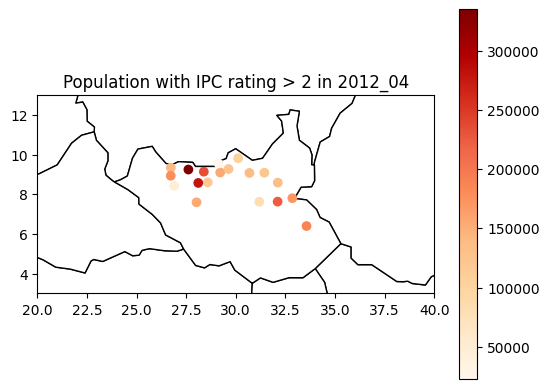

C:\Users\20202182\AppData\Local\Temp\ipykernel_17892\1068525368.py:11: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


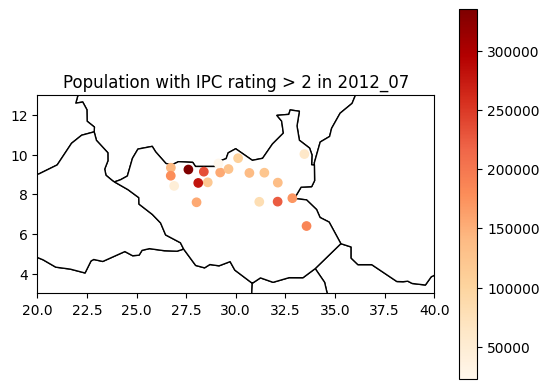

C:\Users\20202182\AppData\Local\Temp\ipykernel_17892\1068525368.py:11: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


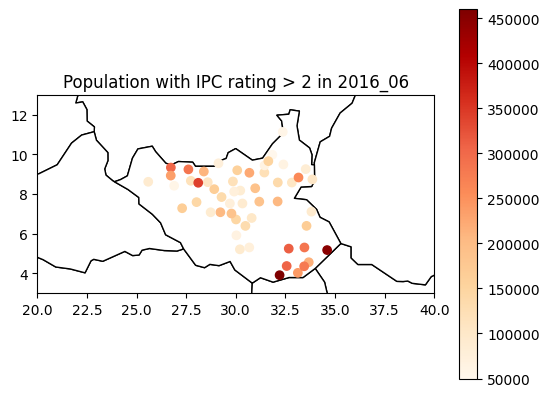

C:\Users\20202182\AppData\Local\Temp\ipykernel_17892\1068525368.py:11: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


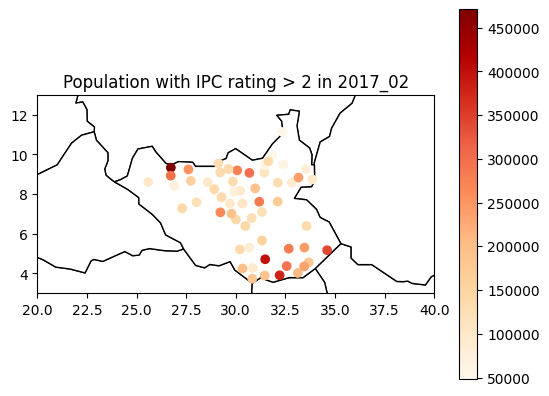

C:\Users\20202182\AppData\Local\Temp\ipykernel_17892\1068525368.py:11: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


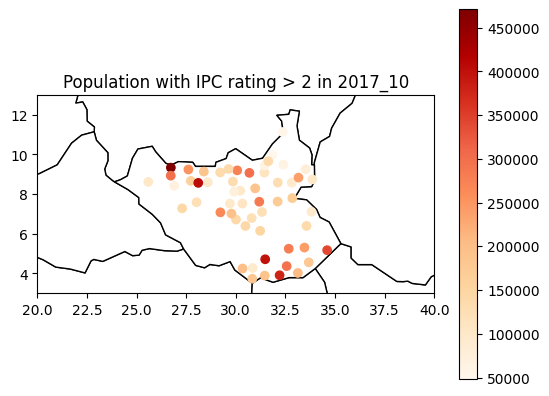

C:\Users\20202182\AppData\Local\Temp\ipykernel_17892\1068525368.py:11: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


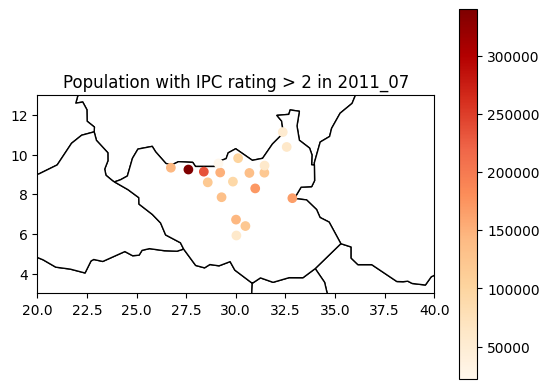

C:\Users\20202182\AppData\Local\Temp\ipykernel_17892\1068525368.py:11: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


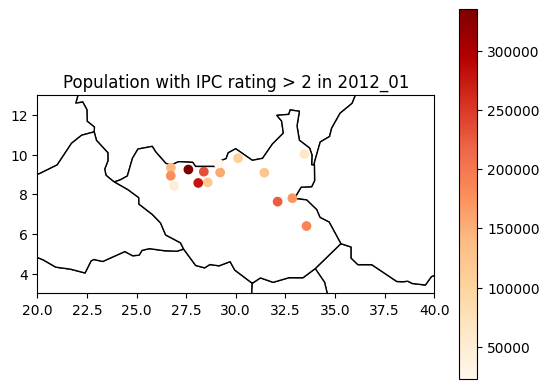

C:\Users\20202182\AppData\Local\Temp\ipykernel_17892\1068525368.py:11: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


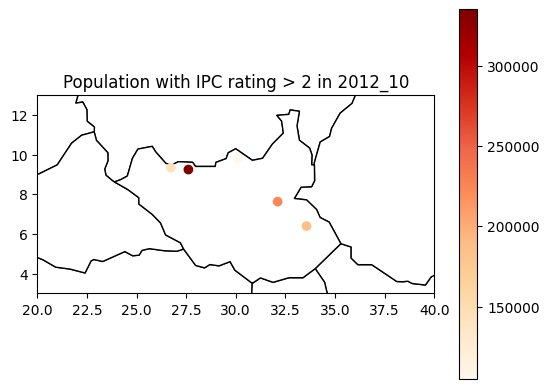

C:\Users\20202182\AppData\Local\Temp\ipykernel_17892\1068525368.py:11: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


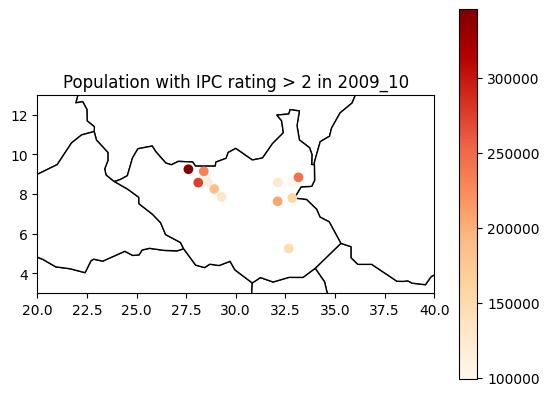

C:\Users\20202182\AppData\Local\Temp\ipykernel_17892\1068525368.py:11: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


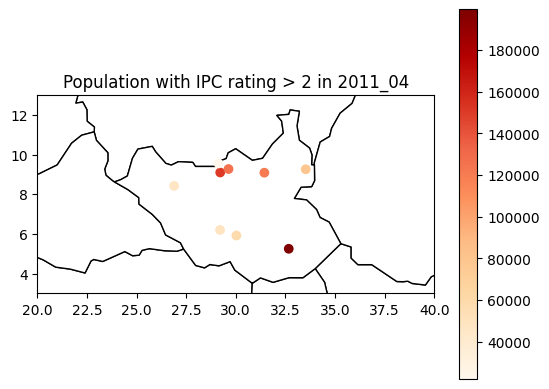

C:\Users\20202182\AppData\Local\Temp\ipykernel_17892\1068525368.py:11: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


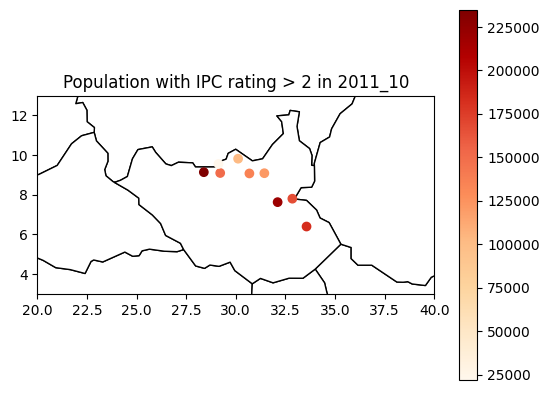

C:\Users\20202182\AppData\Local\Temp\ipykernel_17892\1068525368.py:11: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


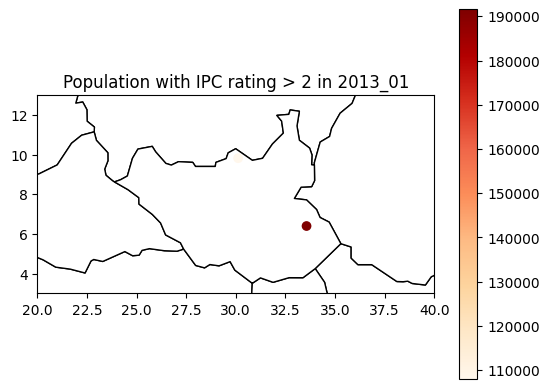

C:\Users\20202182\AppData\Local\Temp\ipykernel_17892\1068525368.py:11: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


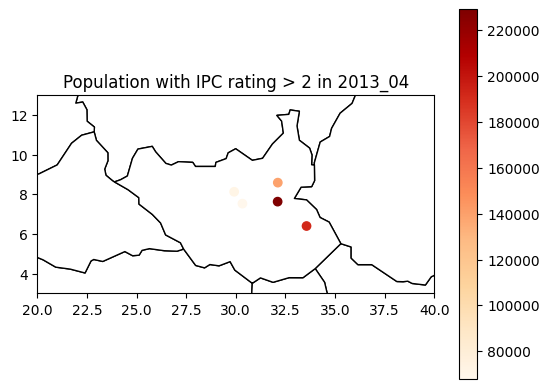

C:\Users\20202182\AppData\Local\Temp\ipykernel_17892\1068525368.py:11: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


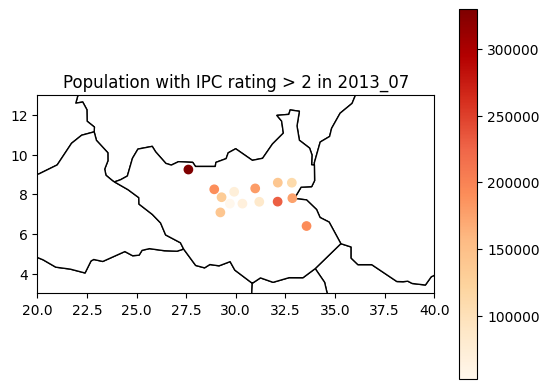

C:\Users\20202182\AppData\Local\Temp\ipykernel_17892\1068525368.py:11: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


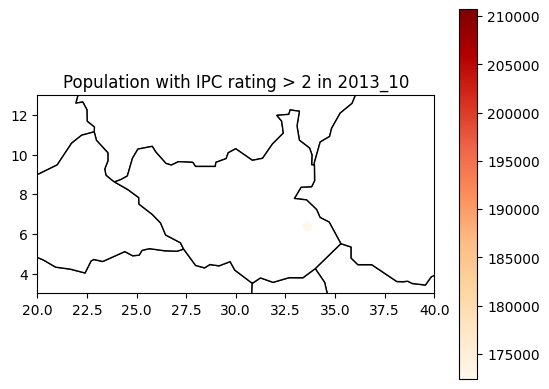

C:\Users\20202182\AppData\Local\Temp\ipykernel_17892\1068525368.py:11: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


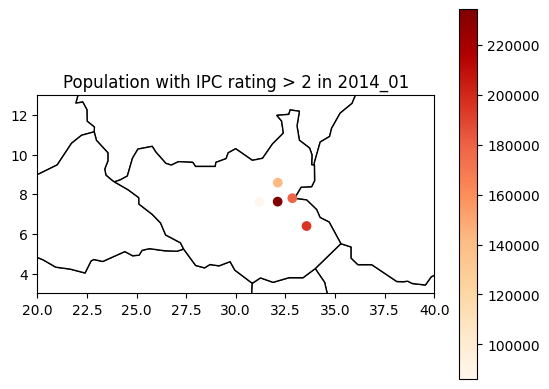

C:\Users\20202182\AppData\Local\Temp\ipykernel_17892\1068525368.py:11: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


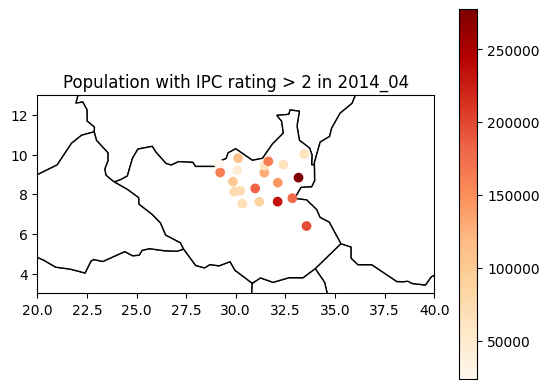

C:\Users\20202182\AppData\Local\Temp\ipykernel_17892\1068525368.py:11: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


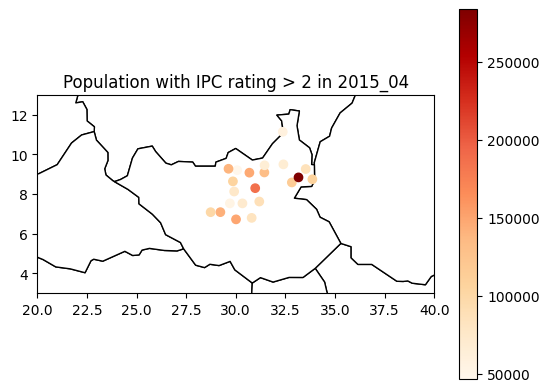

C:\Users\20202182\AppData\Local\Temp\ipykernel_17892\1068525368.py:11: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


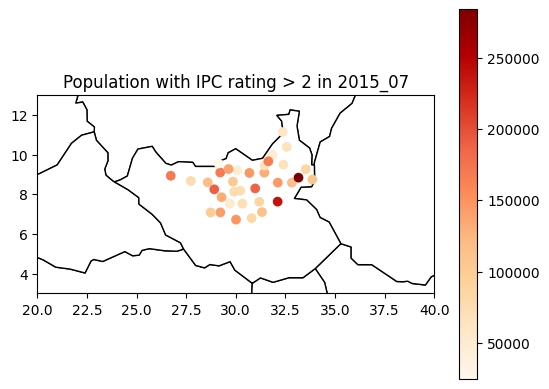

C:\Users\20202182\AppData\Local\Temp\ipykernel_17892\1068525368.py:11: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


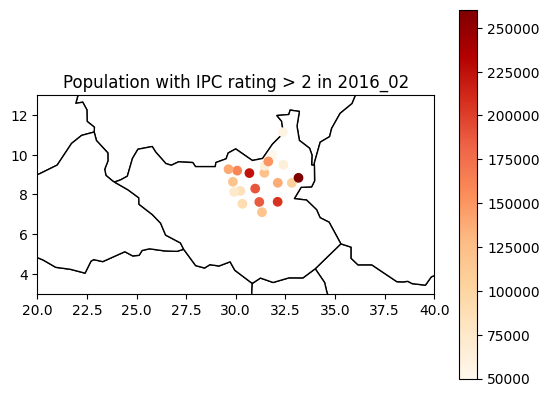

C:\Users\20202182\AppData\Local\Temp\ipykernel_17892\1068525368.py:11: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


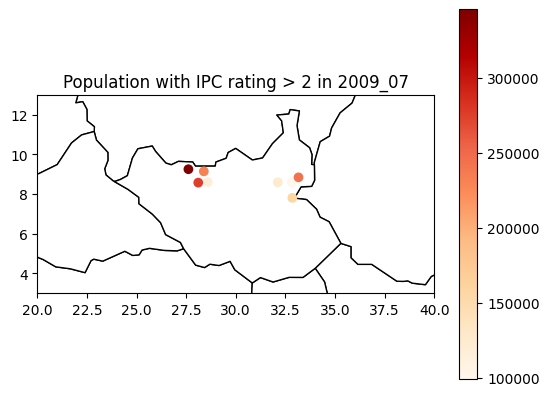

C:\Users\20202182\AppData\Local\Temp\ipykernel_17892\1068525368.py:11: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


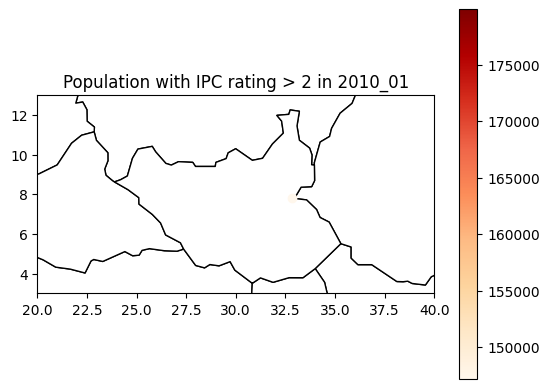

C:\Users\20202182\AppData\Local\Temp\ipykernel_17892\1068525368.py:11: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


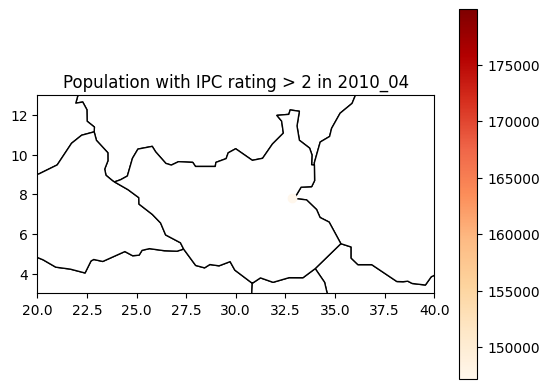

C:\Users\20202182\AppData\Local\Temp\ipykernel_17892\1068525368.py:11: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


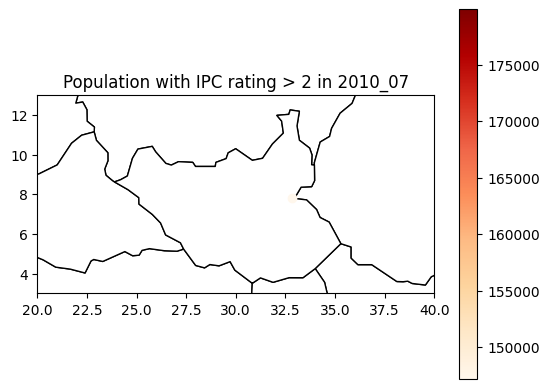

C:\Users\20202182\AppData\Local\Temp\ipykernel_17892\1068525368.py:11: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


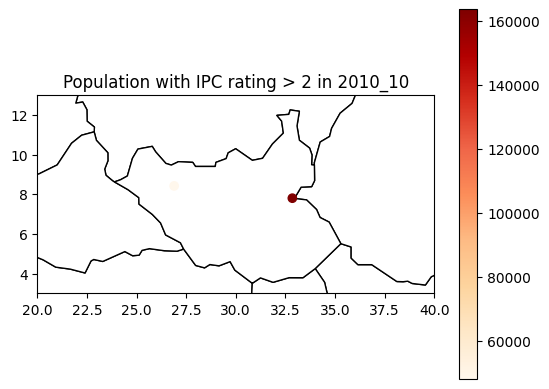

C:\Users\20202182\AppData\Local\Temp\ipykernel_17892\1068525368.py:11: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


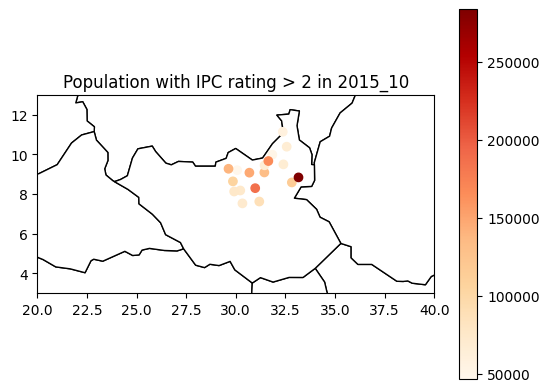

C:\Users\20202182\AppData\Local\Temp\ipykernel_17892\1068525368.py:11: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


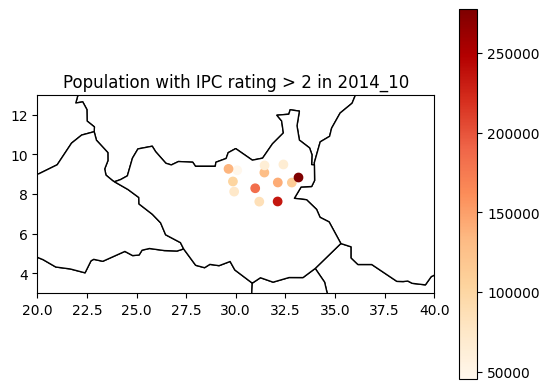

C:\Users\20202182\AppData\Local\Temp\ipykernel_17892\1068525368.py:11: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


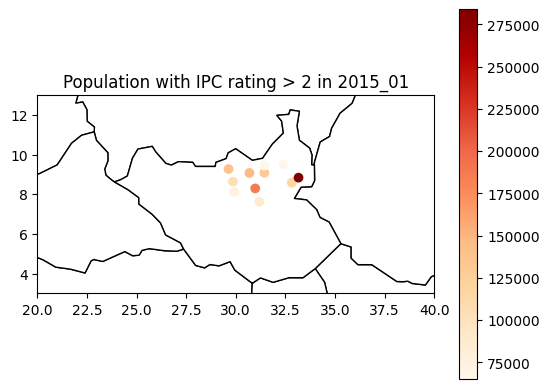

C:\Users\20202182\AppData\Local\Temp\ipykernel_17892\1068525368.py:11: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world


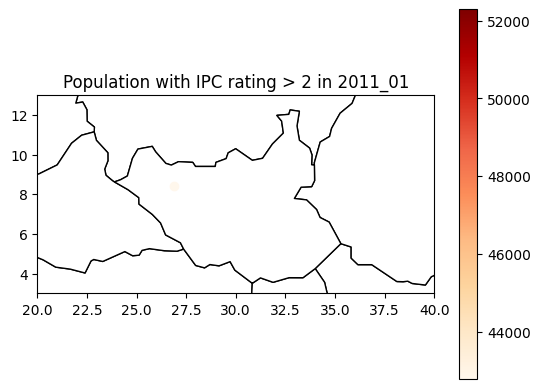

In [135]:
#numer of citizens with IPC>3
filenames =[]
df.dropna(subset=['ipc'], inplace=True)

df = df[df.ipc > 2]
df.head(20)

for month in df['year_month'].unique():
    data_for_month = df[df['year_month'] == month].reset_index()

    world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) # Get map of the world

    ax = world.plot(color="white", edgecolor="black") # Plot world map

    # Bound map to south sudan
    ax.set_xlim(20, 40)
    ax.set_ylim(3, 13)

    gdf = gpd.GeoDataFrame(data_for_month, geometry=gpd.points_from_xy(data_for_month["centx"], data_for_month["centy"])) # Initialize GeoDataFrame

    # Calculate mean pop per administration
    mean_pop = (
        data_for_month.reset_index()[["pop", "district"]]
        .groupby("district")
        .mean()
        .rename(columns={"pop": "mean_pop"})
    )

    # Plot mean pop per administration on map
    gdf.merge(mean_pop, on="district").plot(
        column="mean_pop", ax=ax, legend=True, cmap="OrRd"
    )

    # Set plot title
    ax.set_title(f"Population with IPC rating > 2 in {month}")

    filename = f'images/POPIPC3{month}.png'
    filenames.append(filename)
    plt.savefig(filename)
    plt.show()

In [136]:
#create GIF from plots
with imgio.get_writer('MeanPOPIPC3.gif', duration=500) as writer:
    for filename in filenames:
        image = imgio.imread(filename)
        writer.append_data(image)

C:\Users\20202182\AppData\Local\Temp\ipykernel_17892\1955155542.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imgio.imread(filename)


78


C:\Users\20202182\AppData\Local\Temp\ipykernel_17892\1890703312.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = grouped.mean()


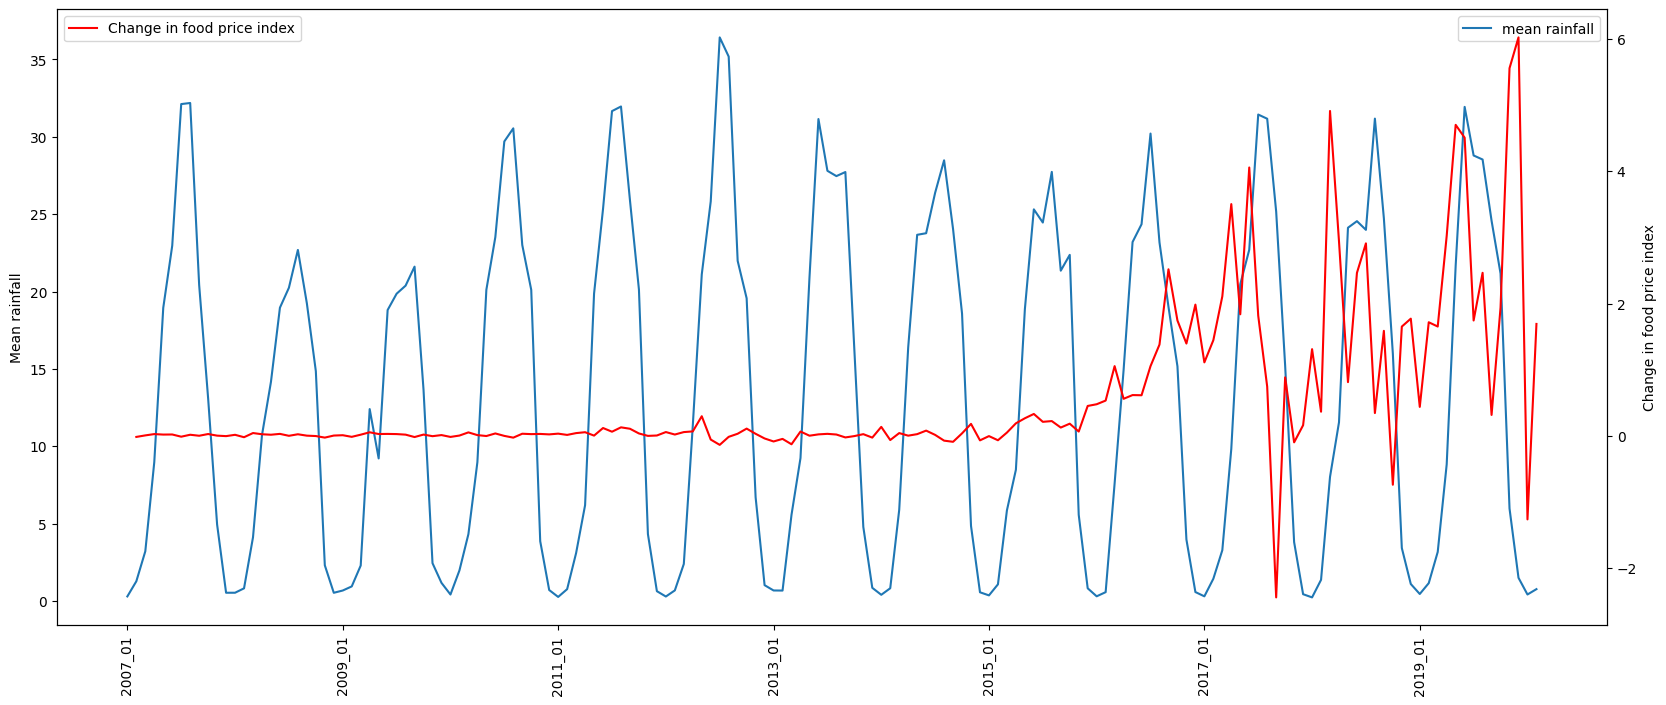

In [125]:
#rainfall -> food prices
df = pd.read_csv("data/food_crises_cleaned.csv") # Read data into DataFrame
df["date"] = pd.to_datetime(df["year_month"], format="%Y_%m") # Create date column
print(len(df['district'].unique()))
df.set_index(["date", "district"], inplace=True) # Set index

grouped = df.groupby('year_month')
grouped = grouped.mean()
grouped["foodprice_diff"] = grouped["food_price_idx"].diff()
grouped.head()

fig,ax = plt.subplots(figsize=(20,8))
ax.plot(grouped["rain_mean"], label="mean rainfall")
ax.set_ylabel("Mean rainfall [mm]")
ax.legend()
ax.tick_params(axis='x', labelrotation=90)
ax2 = ax.twinx()
ax2.plot(grouped["foodprice_diff"], label="Change in food price index", color="red")
ax2.set_ylabel("Change in food price index")
ax2.legend()
ax2.tick_params(axis='x', labelrotation=90)

plt.xticks([0, 24, 48, 72, 96, 120, 144])
plt.show()

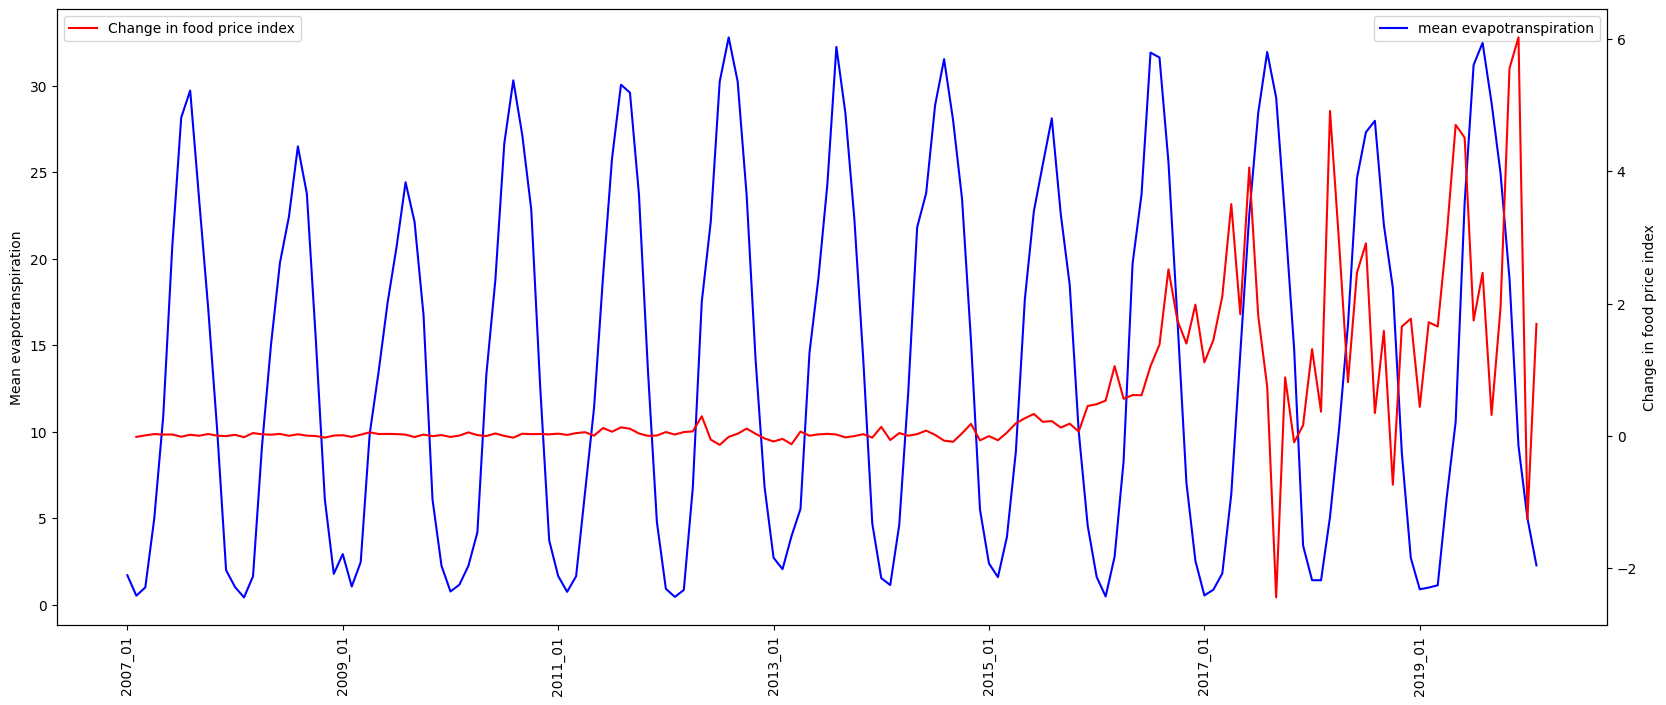

In [130]:
#et -> food prices
fig,ax = plt.subplots(figsize=(20,8))
ax.plot(grouped["et_mean"], label="mean evapotranspiration", color="blue")
ax.set_ylabel("Mean evapotranspiration")
ax.legend()
ax.tick_params(axis='x', labelrotation=90)
ax2 = ax.twinx()
ax2.plot(grouped["foodprice_diff"], label="Change in food price index", color="red")
ax2.set_ylabel("Change in food price index")
ax2.legend()
ax2.tick_params(axis='x', labelrotation=90)

plt.xticks([0, 24, 48, 72, 96, 120, 144])
plt.show()

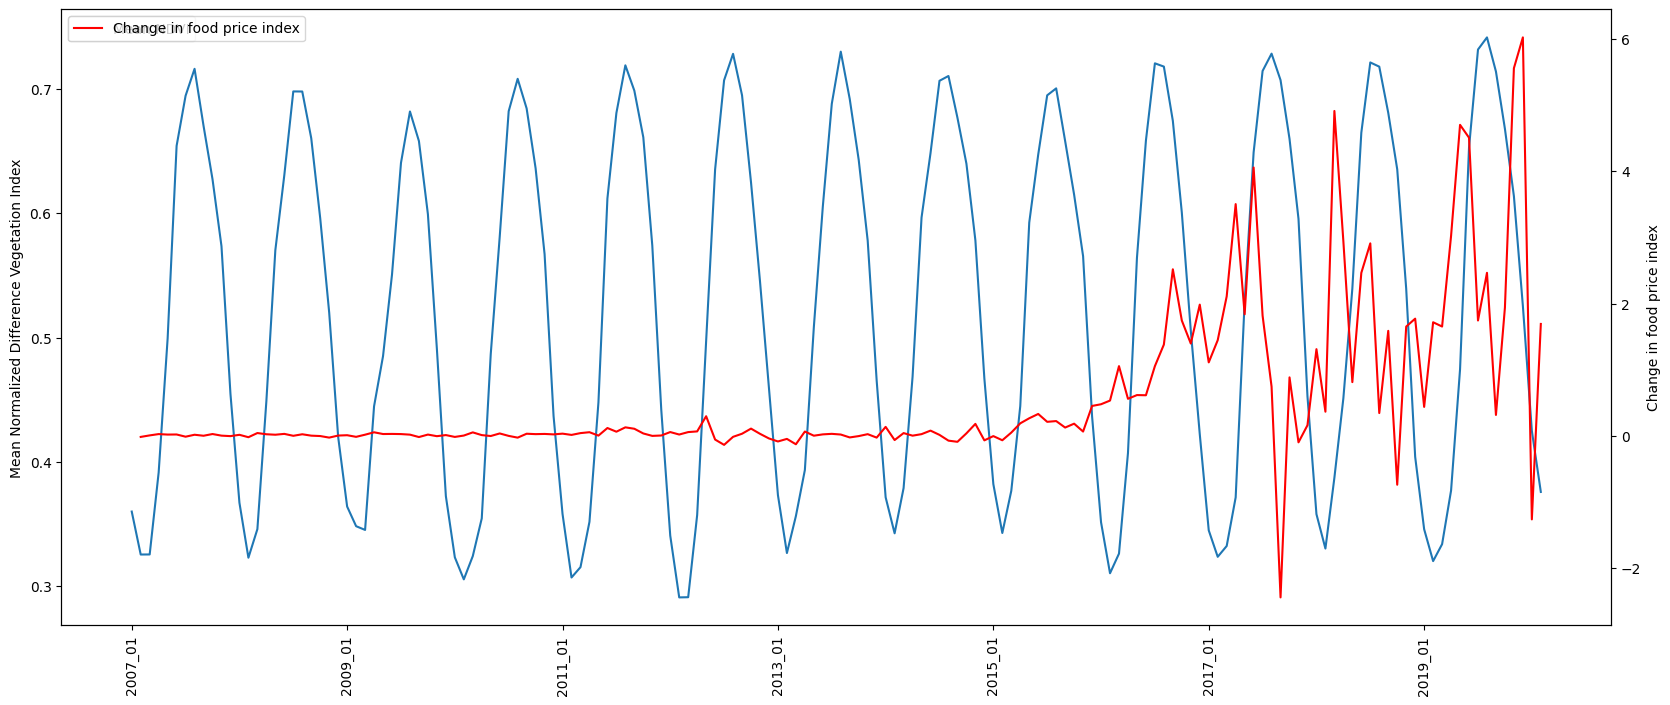

In [129]:
#nvdi -> food prices
fig,ax = plt.subplots(figsize=(20,8))
ax.plot(grouped["ndvi_mean"], label="Mean NDVI")
ax.set_ylabel("Mean Normalized Difference Vegetation Index")
ax.legend()
ax.tick_params(axis='x', labelrotation=90)
ax2 = ax.twinx()
ax2.plot(grouped["foodprice_diff"], label="Change in food price index", color="red")
ax2.set_ylabel("Change in food price index")
ax2.legend()
ax2.tick_params(axis='x', labelrotation=90)

plt.xticks([0, 24, 48, 72, 96, 120, 144])
plt.show()

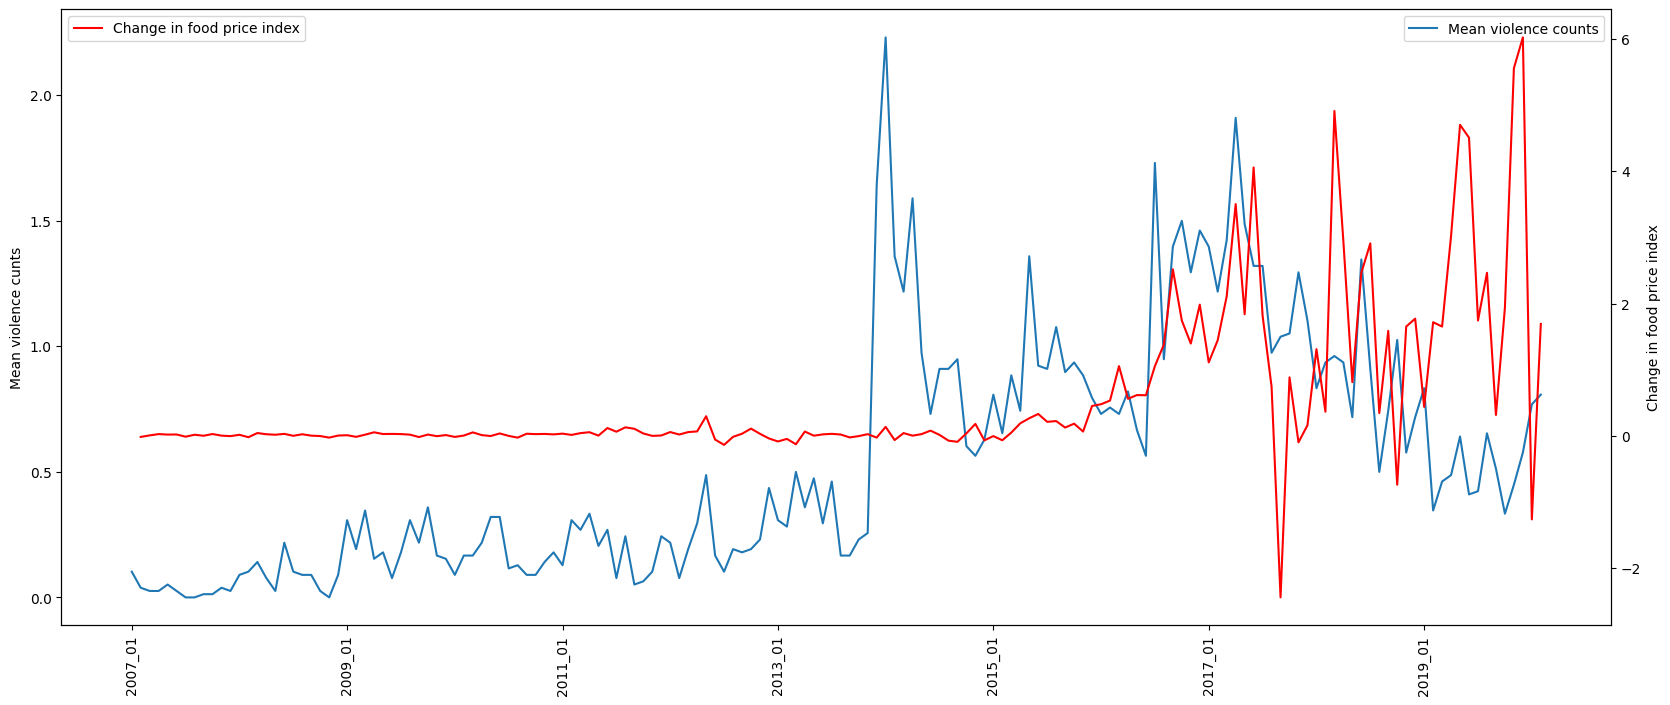

In [131]:
#voilence -> food prices
fig,ax = plt.subplots(figsize=(20,8))
ax.plot(grouped["count_violence"], label="Mean violence counts")
ax.set_ylabel("Mean violence cunts")
ax.legend()
ax.tick_params(axis='x', labelrotation=90)
ax2 = ax.twinx()
ax2.plot(grouped["foodprice_diff"], label="Change in food price index", color="red")
ax2.set_ylabel("Change in food price index")
ax2.legend()
ax2.tick_params(axis='x', labelrotation=90)

plt.xticks([0, 24, 48, 72, 96, 120, 144])
plt.show()

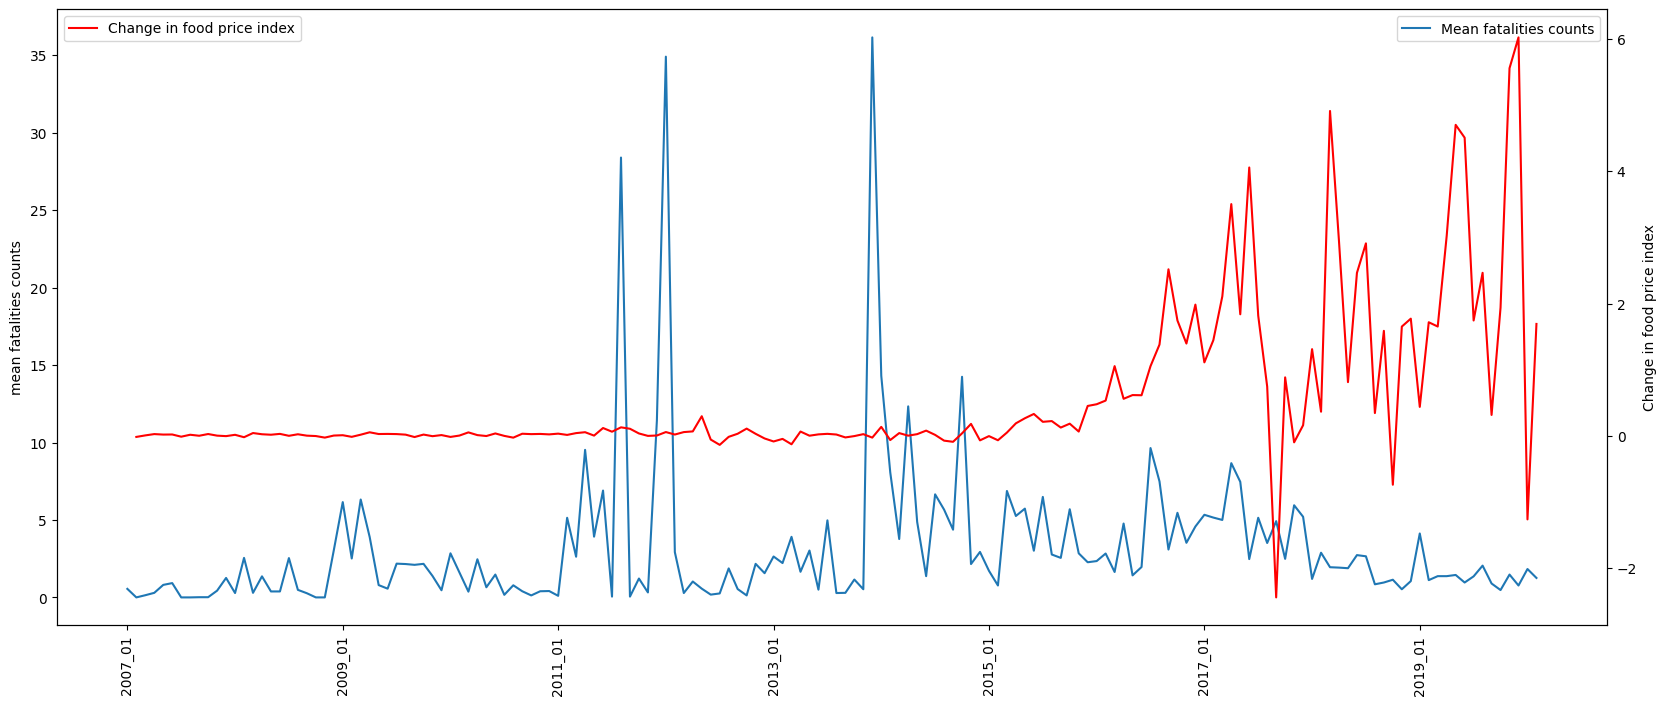

In [128]:
#fatalities -> food prices
fig,ax = plt.subplots(figsize=(20,8))
ax.plot(grouped["sum_fatalities"], label="Mean fatalities counts")
ax.set_ylabel("mean fatalities counts")
ax.legend()
ax.tick_params(axis='x', labelrotation=90)
ax2 = ax.twinx()
ax2.plot(grouped["foodprice_diff"], label="Change in food price index", color="red")
ax2.set_ylabel("Change in food price index")
ax2.legend()
ax2.tick_params(axis='x', labelrotation=90)

plt.xticks([0, 24, 48, 72, 96, 120, 144])
plt.show()

78


C:\Users\20202182\AppData\Local\Temp\ipykernel_17892\1614132711.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped2 = grouped2.mean()


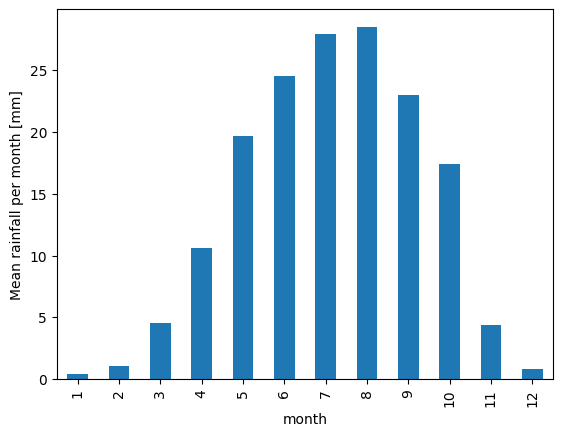

In [152]:
df = pd.read_csv("data/food_crises_cleaned.csv") # Read data into DataFrame
df["date"] = pd.to_datetime(df["year_month"], format="%Y_%m") # Create date column
print(len(df['district'].unique()))
df.set_index(["date", "district"], inplace=True) # Set index

grouped2 = df.groupby('month')
grouped2 = grouped2.mean()
grouped2.head(12)

#plt.plot(grouped2["rain_mean"])

ax = grouped2["rain_mean"].plot(kind="bar") # Initialize barplot of fews_ipc counts
ax.set_ylabel('Mean rainfall per month [mm]'); # Set y label

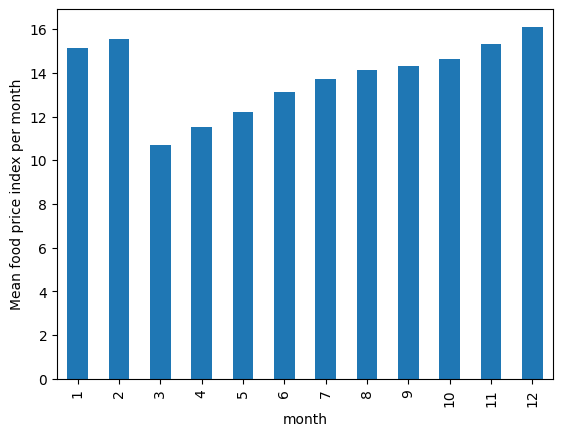

In [151]:
ax = grouped2["food_price_idx"].plot(kind="bar") # Initialize barplot of fews_ipc counts
ax.set_ylabel('Mean food price index per month'); # Set y label



In [153]:
grouped.corr()

district_code  centx  centy      year     month       ipc  \
district_code              NaN    NaN    NaN       NaN       NaN       NaN   
centx                      NaN    NaN    NaN       NaN       NaN       NaN   
centy                      NaN    NaN    NaN       NaN       NaN       NaN   
year                       NaN    NaN    NaN  1.000000 -0.033124  0.882968   
month                      NaN    NaN    NaN -0.033124  1.000000  0.030929   
ipc                        NaN    NaN    NaN  0.882968  0.030929  1.000000   
ha                         NaN    NaN    NaN  0.552192  0.053067  0.518797   
ndvi_mean                  NaN    NaN    NaN  0.040259  0.602171  0.142090   
ndvi_anom                  NaN    NaN    NaN  0.306268 -0.053151  0.408413   
rain_mean                  NaN    NaN    NaN  0.040616  0.253223  0.148265   
rain_anom                  NaN    NaN    NaN  0.261240 -0.026571  0.180514   
et_mean                    NaN    NaN    NaN  0.059808  0.456636  0.118807   
et_anom                    NaN    NaN    NaN  0.349922  0.122482  0.181435   
count_violence             NaN    NaN    NaN  0.680890 -0.051697  0.450170   
sum_fatalities             NaN    NaN    NaN  0.105092 -0.046293 -0.176182   
food_price_idx             NaN    NaN    NaN  0.762554  0.028028  0.796956   
area                       NaN    NaN    NaN       NaN       NaN       NaN   
cropland_pct               NaN    NaN    NaN       NaN       NaN       NaN   
pop                        NaN    NaN    NaN  0.999097 -0.031100  0.871012   
ruggedness_mean            NaN    NaN    NaN       NaN       NaN       NaN   
pasture_pct                NaN    NaN    NaN       NaN       NaN       NaN   
foodprice_diff             NaN    NaN    NaN  0.564618  0.020794  0.687312   

                       ha  ndvi_mean  ndvi_anom  rain_mean  ...   et_anom  \
district_code         NaN        NaN        NaN        NaN  ...       NaN   
centx                 NaN        NaN        NaN        NaN  ...       NaN   
centy                 NaN        NaN        NaN        NaN  ...       NaN   
year             0.552192   0.040259   0.306268   0.040616  ...  0.349922   
month            0.053067   0.602171  -0.053151   0.253223  ...  0.122482   
ipc              0.518797   0.142090   0.408413   0.148265  ...  0.181435   
ha               1.000000   0.114479   0.226713   0.066260  ...  0.193410   
ndvi_mean        0.114479   1.000000   0.091115   0.853355  ...  0.322638   
ndvi_anom        0.226713   0.091115   1.000000  -0.025854  ...  0.655261   
rain_mean        0.066260   0.853355  -0.025854   1.000000  ...  0.269028   
rain_anom       -0.000712   0.036896   0.290079   0.237277  ...  0.476949   
et_mean          0.097577   0.966463   0.055079   0.924327  ...  0.395178   
et_anom          0.193410   0.322638   0.655261   0.269028  ...  1.000000   
count_violence   0.192201  -0.016713   0.271774  -0.027106  ...  0.183613   
sum_fatalities  -0.299877  -0.080843   0.072254  -0.077865  ...  0.049642   
food_price_idx   0.555345   0.070597   0.292742   0.019027  ...  0.225846   
area                  NaN        NaN        NaN        NaN  ...       NaN   
cropland_pct          NaN        NaN        NaN        NaN  ...       NaN   
pop              0.542418   0.042831   0.310334   0.042774  ...  0.353545   
ruggedness_mean       NaN        NaN        NaN        NaN  ...       NaN   
pasture_pct           NaN        NaN        NaN        NaN  ...       NaN   
foodprice_diff   0.434278   0.010070   0.160638   0.017763  ...  0.152126   

                 count_violence  sum_fatalities  food_price_idx  area  \
district_code               NaN             NaN             NaN   NaN   
centx                       NaN             NaN             NaN   NaN   
centy                       NaN             NaN             NaN   NaN   
year                   0.680890        0.105092        0.762554   NaN   
month                 -0.051697       -0.046293        0.028028   NaN   
ipc         